# Proyecto Final: Caracterización Geoespacial del Covid-19 en Antioquia
## Análisis Geoespacial - Edier V. Aristizabal G.
### Universidad Nacional de Colombia - Sede Medellín, Facultad de Minas

By Alvin Garcia Chaves

Especializacón en Analítica

# 1. PROBLEM DEFINITION

## Introduction

En principio se quiere abordar un proyecto de uso de herramientas de Análisis Geoespacial en el área de la salud.  Para ello se ha explorado que información de datos abiertos esté disponible y que contenga datos georeferenciados, uno de estos casos que está bien documentado es el tema del COVID-19.

Por lo anterior el proyecto que se realizará en este curso es "Caracterización Geoespacial del Covid-19 en Antioquia", en este se pretende caracterizar como es la distribución y comportamiento de casos confirmados por COVID-19 en los municipios del departamento de Antioquia a través de un Análisis Geoespacial.

## Variable definition

Las variables a ser consideradas serán:
- ID Subregión
- ID municipio
- Area del municipio
- Población total
- Densidad poblacional
- Promedio anual de Humedad Relativa
- Promedio anual de Temperatura
- Promedio de Altitud
- No. de muertos por COVID-19
- No. de recuperados por COVID-19

La variable objetivo es continua y corresponde a la *Tasa o Razón de Letalidad* (CFR, por sus siglas en inglés *Case Fatality Rate*), como indicador de mortalidad causada por el COVID-19.

Este indice se calcula como el número de muertes conocidas dividido entre el número total de casos confirmados, expresada en porcentaje (Chaparro_2021).

$$CFR = \dfrac{\text{No. de muertes por la enfermedad}}{\text{No. de muertes por la enfermedad + No. de casos recuperados de la enfermedad}} \times 100$$

Para este estudio se considerará que ocurre un evento cuando el *CFR* supere el umbral del 3%. Por lo tanto, un evento se registra si CFR > 3.


#### Catálogo de Variables

| Nombre     | Definición                   | Tipo de dato |
|:----------:|:-----------------------------|:------------:|
| codigo_subregion | Código administrativo para las subregiones del Departamento | String         |
| codigo_municipio | Código DANE del Municipio    | String         |
| nombre_municipio | Nombre del Municipio | String |
| poblacion | Total de habitantes   | Int64         |
| densidad | No. habitantes por Km2    | Float         |
| altitud | Altitud promedio   | Int64         |
| temperatura | Temperatura promedio anual   | Float         |
| humedad_relativa | Humedad Relativa promedio anual    | Float         |
| muertes_covid19 | No. de muertos a causa del COVID-19    | Int64        |
| recuperados_covid19 | No. personas recuperadas por COVID-19    | Float        |
| cfr | Razon de letalidad   | Float        |
| longitude | Coordenada de posición geofráfica (E-W) | Float |
| Latitude | Coordenada de posición geográfica (N-S) | Float |
| geometry | Geometría del Objeto (Point - Poligono)    | Object       |




# 2. Data Collection


### Data source
La información demográfica y de casos positivos de personas con COVID-19, proviene del Instituto Nacional de Salud Colombia y los datos de población de los municipios de Antioquia provienen del DANE, ambos datasets están publicados en el portal Datos Abiertos Colombia. Los mapas y georeferenciación de los municipios son obtenidos del geoportal del DANE y Gobernación de Antioquia. La información meteorológica de temperatura, humedad y altitud fueron obtenidos desde Google Earth Engine.

- INS - Instituto Nacional de Salud Colombia. https://www.ins.gov.co
- DANE - Departamento Administrativo Nacional de Estadística. https://geoportal.dane.gov.co/
- Datos Abiertos Colombia.  https://www.datos.gov.co/
- Secretaría Seccional de Salud y Protección Social | Antioquia. https://dssa.gov.co/
- Geoportal de la Gobernación de Antioquia. https://geodatos-gobantioquia.opendata.arcgis.com/
- Google Earth Engine. https://earthengine.google.com/

### Load Datasets

In [327]:
%pip install geopandas
%pip install plotly
%pip install matplotlib-map-utils

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [328]:
import matplotlib.pyplot as plt
from matplotlib_map_utils.core.north_arrow import NorthArrow, north_arrow
from matplotlib_map_utils.core.scale_bar import ScaleBar, scale_bar
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

#### Demographics and Covid-19

In [351]:
# Poblacion de Antioquia por municipio
poblacion_mpios_antioquia = pd.read_csv('Data/Sources/poblacion_antioquia_2024.csv')
poblacion_mpios_antioquia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   codigo_municipio  125 non-null    int64 
 1   nombre_municipio  125 non-null    object
 2   nombre_subregion  125 non-null    object
 3   codigo_subregion  125 non-null    int64 
 4   poblacion         125 non-null    int64 
 5   hombres           125 non-null    int64 
 6   mujeres           125 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 7.0+ KB


In [352]:
poblacion_mpios_antioquia.to_csv('Data/Processed/poblacion_mpios_antioquia.csv', index=False)

In [331]:
# Casos de COVID-19 en Antioquia por municipio
covid19_colombia = pd.read_csv('Data/Sources/Casos_positivos_de_COVID-19_en_Colombia._20250404.csv')
covid19_antioquia = covid19_colombia.query("`Nombre departamento` == 'ANTIOQUIA'")
covid19_antioquia.info()

covid19_antioquia.to_csv('Data/Processed/covid19_antioquia.csv', index=False, encoding='utf-8')

/var/folders/nq/kj34bm5140bgwbktdx1z94cm0000gn/T/ipykernel_4132/2690787715.py:2: DtypeWarning:

Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
Index: 955271 entries, 14 to 6390951
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fecha reporte web             955271 non-null  object 
 1   ID de caso                    955271 non-null  int64  
 2   Fecha de notificación         955271 non-null  object 
 3   Código DIVIPOLA departamento  955271 non-null  int64  
 4   Nombre departamento           955271 non-null  object 
 5   Código DIVIPOLA municipio     955271 non-null  int64  
 6   Nombre municipio              955271 non-null  object 
 7   Edad                          955271 non-null  int64  
 8   Unidad de medida de edad      955271 non-null  int64  
 9   Sexo                          955271 non-null  object 
 10  Tipo de contagio              955271 non-null  object 
 11  Ubicación del caso            950658 non-null  object 
 12  Estado                        950658 non-null  

#### Geospatial

In [332]:
# Mapa de Antioquia por municipio
geo_colombia = gpd.read_file('Data/Sources/MGN2024_MPIO_POLITICO/MGN_ADM_MPIO_GRAFICO.shp')
geo_mpios_antioquia = geo_colombia.query('dpto_ccdgo == "05"')

geo_mpios_antioquia.to_file('Data/Processed/geo_mpios_antioquia.shp', driver='ESRI Shapefile')

In [333]:
print(geo_mpios_antioquia.crs)
geo_mpios_antioquia.info()

EPSG:4326
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dpto_ccdgo  125 non-null    object  
 1   mpio_ccdgo  125 non-null    object  
 2   mpio_cdpmp  125 non-null    object  
 3   dpto_cnmbr  125 non-null    object  
 4   mpio_cnmbr  125 non-null    object  
 5   mpio_crslc  125 non-null    object  
 6   mpio_tipo   125 non-null    object  
 7   mpio_narea  125 non-null    float64 
 8   mpio_nano   125 non-null    int32   
 9   shape_Leng  125 non-null    float64 
 10  shape_Area  125 non-null    float64 
 11  geometry    125 non-null    geometry
dtypes: float64(3), geometry(1), int32(1), object(7)
memory usage: 12.2+ KB


/usr/local/Caskroom/miniforge/base/envs/geo/lib/python3.11/site-packages/matplotlib_map_utils/core/scale_bar.py:676: UserWarning:

Provided CRS 4326 uses degrees. An attempt will be made at conversion, but there will be accuracy issues: it is recommended that you use a projected CRS instead.



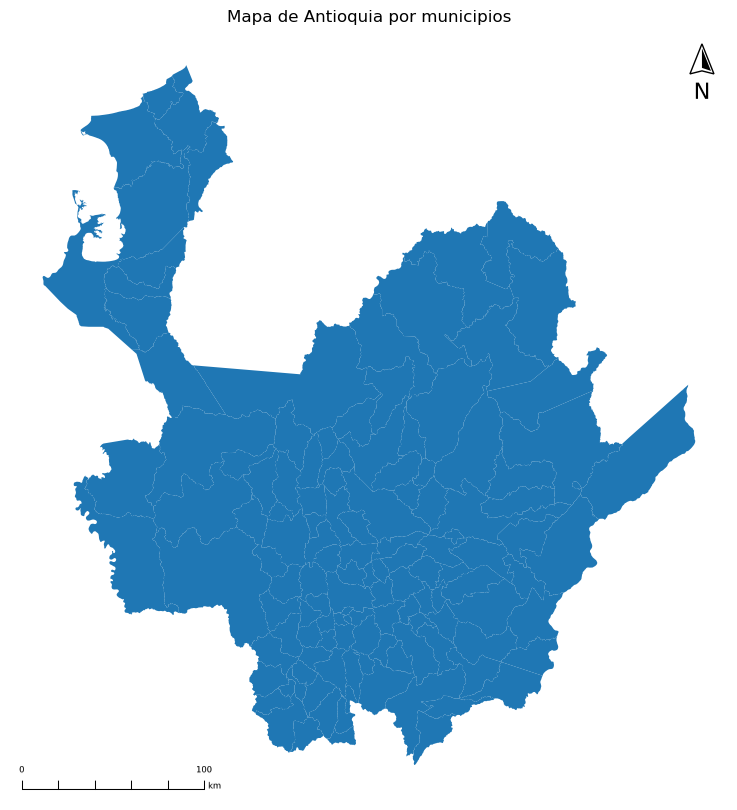

In [334]:
fig, ax = plt.subplots(figsize=(10, 10))
geo_mpios_antioquia.plot( ax=ax)
north_arrow(ax, location="upper right", rotation={"crs": "EPSG:4326",  "reference": "center"}, scale=0.3, shadow=False)
scale_bar(ax, location="lower left", style="ticks", bar={"projection": 4326})
ScaleBar.set_size(size="sm")
plt.axis('off')
plt.title('Mapa de Antioquia por municipios')
plt.show()

#### DEM
La información de Altitud promedio de los municipios de Antioquia fue obtenida del dataset NASA SRTM Digital Elevation 30m disponible en Google Earth Engine.
```
// Load zones Polygons
var zones = ee.FeatureCollection("users/algarciach/geo_mpios_antioquia");

// Load SRTM DEM dataset (30m resolution)
var dataset = ee.Image("USGS/SRTMGL1_003");

// Calculate mean DEM elevation by zones
var dem_mean = dataset.reduceRegions({
  collection: zones, 
  reducer: ee.Reducer.mean().setOutputs(['altitud']),
  scale: 30,
});

// Export results as GeoJSON
Export.table.toDrive({
  collection: dem_mean,
  description: 'dem_mpios_antioquia',
  fileFormat: 'GeoJSON'
});

```


In [335]:
dem_mpios_antioquia = gpd.read_file('Data/Processed/dem_mpios_antioquia.geojson')
dem_mpios_antioquia.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          125 non-null    object  
 1   altitud     125 non-null    float64 
 2   area_munic  125 non-null    float64 
 3   codigo_mun  125 non-null    object  
 4   nombre_mun  125 non-null    object  
 5   shape_Area  125 non-null    float64 
 6   shape_Leng  125 non-null    float64 
 7   geometry    125 non-null    geometry
dtypes: float64(4), geometry(1), object(3)
memory usage: 7.9+ KB


#### Temperature & Relative Humity
La información de Temperatura promedio anual de los municipios de Antioquia fue obtenida de los datasets WorldClim BIO Variables V1 y la Humedad Relativa promedio anual fue estimada a partir de los datasets ERA5-Land Monthly - ECMWF Climate Reanalys, ambos disponibles en Google Earth Engine.

```
// Load zones polygons
var zones = ee.FeatureCollection("users/algarciach/geo_mpios_antioquia");

// Load WorldClim V1 BIO1 (Annual Mean Temperature * 10)
var worldclim = ee.Image('WORLDCLIM/V1/BIO')
  .select('bio01')  // BIO1
  .divide(10)       // Convert to °C
  .rename('temperatura');

// Load ERA5-Land Monthly data for 2020
var era5 = ee.ImageCollection('ECMWF/ERA5_LAND/MONTHLY')
  .filterDate('2020-01-01', '2020-12-31');

// Compute mean temperature and dewpoint (°C)
var temp = era5.select('temperature_2m').mean().subtract(273.15);
var dewpoint = era5.select('dewpoint_temperature_2m').mean().subtract(273.15);

// Constants for Clausius–Clapeyron
var a = 17.625;
var b = 243.04;

// Saturation vapor pressure (es) from temperature
var es = temp.expression(
  '6.112 * exp((a * T) / (b + T))',
  {T: temp, a: a, b: b}
);

// Actual vapor pressure (ea) from dewpoint
var ea = dewpoint.expression(
  '6.112 * exp((a * Td) / (b + Td))',
  {Td: dewpoint, a: a, b: b}
);

// Calculate RH (%), clipped between 0 and 100
var rh = ea.divide(es).multiply(100).max(0).min(100).rename('humedad_relative');

// Combine WorldClim temp and ERA5 RH
var combined = worldclim.addBands(rh);

// Reduce by zones (mean values)
var stats = combined.reduceRegions({
  collection: zones,
  reducer: ee.Reducer.mean(),
  scale: 1000,  // ERA5 native scale approx
});
print(stats)
// Export results as GeoJSON to Google Drive
Export.table.toDrive({
  collection: stats,
  description: 'trh_mpios_antioquia',
  fileFormat: 'GeoJSON'
});


```


In [336]:
trh_mpios_antioquia = gpd.read_file('Data/Processed/trh_mpios_antioquia.geojson')
trh_mpios_antioquia.describe()


area_munic  humedad_relative  shape_Area  shape_Leng  temperatura
count   125.000000        125.000000  125.000000  125.000000   125.000000
mean    502.455862         80.519797    0.041081    1.183403    21.016742
std     586.093207          4.885657    0.047943    0.883710     3.587705
min      15.659283         63.247296    0.001278    0.165820    12.804236
25%     143.646022         77.939795    0.011721    0.618756    18.206978
50%     257.948769         80.948905    0.021061    0.880315    20.901251
75%     540.814988         83.501483    0.044236    1.419594    23.209307
max    2921.874435         91.568995    0.239140    6.639459    28.252375

# 3. Data Preprocessing 

## Clean, merge and filter

In [337]:
import unicodedata

In [338]:
def normalize(text):
    nfkd = unicodedata.normalize('NFKD', text)
    return ''.join([c for c in nfkd if not unicodedata.combining(c)]).upper()

In [339]:
dem_mpios_antioquia = gpd.read_file('Data/Processed/dem_mpios_antioquia.geojson')
dem_mpios_antioquia.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          125 non-null    object  
 1   altitud     125 non-null    float64 
 2   area_munic  125 non-null    float64 
 3   codigo_mun  125 non-null    object  
 4   nombre_mun  125 non-null    object  
 5   shape_Area  125 non-null    float64 
 6   shape_Leng  125 non-null    float64 
 7   geometry    125 non-null    geometry
dtypes: float64(4), geometry(1), object(3)
memory usage: 7.9+ KB


In [340]:
trh_mpios_antioquia = gpd.read_file('Data/Processed/trh_mpios_antioquia.geojson')
trh_mpios_antioquia.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                125 non-null    object  
 1   area_munic        125 non-null    float64 
 2   codigo_mun        125 non-null    object  
 3   humedad_relative  125 non-null    float64 
 4   nombre_mun        125 non-null    object  
 5   shape_Area        125 non-null    float64 
 6   shape_Leng        125 non-null    float64 
 7   temperatura       125 non-null    float64 
 8   geometry          125 non-null    geometry
dtypes: float64(5), geometry(1), object(3)
memory usage: 8.9+ KB


In [341]:
dem_mpios_antioquia = dem_mpios_antioquia.rename(columns={
    "codigo_mun": "codigo_municipio"
})
trh_mpios_antioquia = trh_mpios_antioquia.rename(columns={
    "humedad_relative": "humedad_relativa",
    "codigo_mun": "codigo_municipio"
})


In [343]:
covid19_antioquia = pd.read_csv('Data/Processed/covid19_antioquia.csv')
covid19_antioquia.info()

/var/folders/nq/kj34bm5140bgwbktdx1z94cm0000gn/T/ipykernel_4132/4126945662.py:1: DtypeWarning:

Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955271 entries, 0 to 955270
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fecha reporte web             955271 non-null  object 
 1   ID de caso                    955271 non-null  int64  
 2   Fecha de notificación         955271 non-null  object 
 3   Código DIVIPOLA departamento  955271 non-null  int64  
 4   Nombre departamento           955271 non-null  object 
 5   Código DIVIPOLA municipio     955271 non-null  int64  
 6   Nombre municipio              955271 non-null  object 
 7   Edad                          955271 non-null  int64  
 8   Unidad de medida de edad      955271 non-null  int64  
 9   Sexo                          955271 non-null  object 
 10  Tipo de contagio              955271 non-null  object 
 11  Ubicación del caso            950658 non-null  object 
 12  Estado                        950658 non-nul

In [344]:
covid19_antioquia = covid19_antioquia.rename(columns={
    "fecha reporte web": "fecha_reporte",
    "Código DIVIPOLA municipio": "codigo_municipio",
    "Recuperado": "estado",
    "Edad": "edad",
    "Sexo": "sexo",
})
covid19_antioquia["fecha_reporte"] = pd.to_datetime(covid19_antioquia["fecha_reporte"])
covid19_antioquia["codigo_municipio"] = covid19_antioquia["codigo_municipio"].astype(str).str.zfill(5)
covid19_antioquia["muertes_covid19"] = covid19_antioquia["estado"].apply(lambda x: 1 if x == "Fallecido" else 0)
covid19_antioquia["recuperados_covid19"] = covid19_antioquia["estado"].apply(lambda x: 1 if x == "Recuperado" else 0)
covid19_antioquia = covid19_antioquia[["fecha_reporte", "codigo_municipio", "edad", "sexo", "muertes_covid19", "recuperados_covid19"]]

covid19_antioquia.to_csv('Data/Processed/covid19_antioquia.csv', index=False, encoding='utf-8')


In [345]:
covid19_antioquia.info()
covid19_antioquia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955271 entries, 0 to 955270
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fecha_reporte        955271 non-null  datetime64[ns]
 1   codigo_municipio     955271 non-null  object        
 2   edad                 955271 non-null  int64         
 3   sexo                 955271 non-null  object        
 4   muertes_covid19      955271 non-null  int64         
 5   recuperados_covid19  955271 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 43.7+ MB


fecha_reporte codigo_municipio  edad sexo  muertes_covid19  \
0    2020-11-08            05266    37    F                0   
1    2020-11-08            05266    37    F                0   
2    2020-11-08            05360    36    F                0   
3    2020-11-08            05266    63    F                0   
4    2020-08-05            05001    52    M                0   

   recuperados_covid19  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [353]:
poblacion_mpios_antioquia = gpd.read_file('Data/Processed/poblacion_mpios_antioquia.csv')
poblacion_mpios_antioquia["codigo_municipio"] = poblacion_mpios_antioquia["codigo_municipio"].astype(str).str.zfill(5)
poblacion_mpios_antioquia["codigo_subregion"] = poblacion_mpios_antioquia["codigo_subregion"].astype(str).str.zfill(2)
poblacion_mpios_antioquia["poblacion"] = poblacion_mpios_antioquia["poblacion"].astype(int)
poblacion_mpios_antioquia.info()
poblacion_mpios_antioquia.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   codigo_municipio  125 non-null    object
 1   nombre_municipio  125 non-null    object
 2   nombre_subregion  125 non-null    object
 3   codigo_subregion  125 non-null    object
 4   poblacion         125 non-null    int64 
 5   hombres           125 non-null    object
 6   mujeres           125 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.0+ KB


codigo_municipio nombre_municipio nombre_subregion codigo_subregion  \
0            05142         CARACOLI  MAGDALENA MEDIO               03   
1            05425            MACEO  MAGDALENA MEDIO               03   
2            05579    PUERTO BERRIO  MAGDALENA MEDIO               03   
3            05585      PUERTO NARE  MAGDALENA MEDIO               03   
4            05591   PUERTO TRIUNFO  MAGDALENA MEDIO               03   

   poblacion hombres mujeres  
0       4824    2417    2407  
1       8707    4299    4408  
2      42203   21122   21081  
3      15232    7563    7669  
4      19554   10696    8858

In [354]:
poblacion_mpios_antioquia = poblacion_mpios_antioquia.merge(
    dem_mpios_antioquia[['altitud', 'codigo_municipio']],
    on='codigo_municipio',
    how='left'
)
poblacion_mpios_antioquia = poblacion_mpios_antioquia.merge(
    trh_mpios_antioquia[['temperatura', 'humedad_relativa', 'codigo_municipio']],
    on='codigo_municipio',
    how='left'
)


poblacion_mpios_antioquia.to_csv('Data/Processed/poblacion_mpios_antioquia.csv', index=False, encoding='utf-8')

In [355]:
poblacion_mpios_antioquia.info()
poblacion_mpios_antioquia.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigo_municipio  125 non-null    object 
 1   nombre_municipio  125 non-null    object 
 2   nombre_subregion  125 non-null    object 
 3   codigo_subregion  125 non-null    object 
 4   poblacion         125 non-null    int64  
 5   hombres           125 non-null    object 
 6   mujeres           125 non-null    object 
 7   altitud           125 non-null    float64
 8   temperatura       125 non-null    float64
 9   humedad_relativa  125 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 9.9+ KB


codigo_municipio nombre_municipio nombre_subregion codigo_subregion  \
0            05142         CARACOLI  MAGDALENA MEDIO               03   
1            05425            MACEO  MAGDALENA MEDIO               03   
2            05579    PUERTO BERRIO  MAGDALENA MEDIO               03   
3            05585      PUERTO NARE  MAGDALENA MEDIO               03   
4            05591   PUERTO TRIUNFO  MAGDALENA MEDIO               03   

   poblacion hombres mujeres     altitud  temperatura  humedad_relativa  
0       4824    2417    2407  624.071779    25.104725         74.246953  
1       8707    4299    4408  801.129901    24.064321         75.486478  
2      42203   21122   21081  302.977808    26.774666         68.166473  
3      15232    7563    7669  308.099489    26.793396         68.317391  
4      19554   10696    8858  222.031621    27.299693         63.247296

In [356]:
municipios_antioquia = gpd.read_file("Data/Processed/geo_mpios_antioquia.shp")
municipios_antioquia.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dpto_ccdgo  125 non-null    object  
 1   mpio_ccdgo  125 non-null    object  
 2   mpio_cdpmp  125 non-null    object  
 3   dpto_cnmbr  125 non-null    object  
 4   mpio_cnmbr  125 non-null    object  
 5   mpio_crslc  125 non-null    object  
 6   mpio_tipo   125 non-null    object  
 7   mpio_narea  125 non-null    float64 
 8   mpio_nano   125 non-null    int32   
 9   shape_Leng  125 non-null    float64 
 10  shape_Area  125 non-null    float64 
 11  geometry    125 non-null    geometry
dtypes: float64(3), geometry(1), int32(1), object(7)
memory usage: 11.4+ KB


In [357]:
municipios_antioquia = municipios_antioquia.rename(columns={"mpio_cdpmp": "codigo_municipio",
                                                          "mpio_cnmbr": "nombre_municipio", "mpio_narea": "area_municipio"})
municipios_antioquia["nombre_municipio"] = municipios_antioquia["nombre_municipio"].apply(normalize)
municipios_antioquia["codigo_municipio"] = municipios_antioquia["codigo_municipio"].astype(str).str.zfill(5)
municipios_antioquia = municipios_antioquia.merge(poblacion_mpios_antioquia[["codigo_subregion", "codigo_municipio"]], on="codigo_municipio", how="left")

municipios_antioquia = municipios_antioquia[["codigo_subregion","codigo_municipio", "nombre_municipio", "area_municipio", "geometry"]]
print(municipios_antioquia.crs)
municipios_antioquia.head()


EPSG:4326


codigo_subregion codigo_municipio nombre_municipio  area_municipio  \
0               01            05001         MEDELLIN      374.834005   
1               07            05002        ABEJORRAL      507.141095   
2               06            05004         ABRIAQUI      296.894050   
3               07            05021       ALEJANDRIA      128.932153   
4               08            05030            AMAGA       84.132477   

                                            geometry  
0  POLYGON ((-75.66974 6.3736, -75.66965 6.3736, ...  
1  POLYGON ((-75.46938 5.94575, -75.46897 5.94571...  
2  POLYGON ((-76.08351 6.7505, -76.08325 6.75048,...  
3  POLYGON ((-75.0332 6.41586, -75.03313 6.41585,...  
4  POLYGON ((-75.67587 6.08561, -75.6754 6.08491,...

In [360]:
municipios_antioquia.to_file("Data/Processed/areas_municipios_antioquia.geojson", driver="GeoJSON")

## Transformation

#### Create Subregion Map

<Axes: >

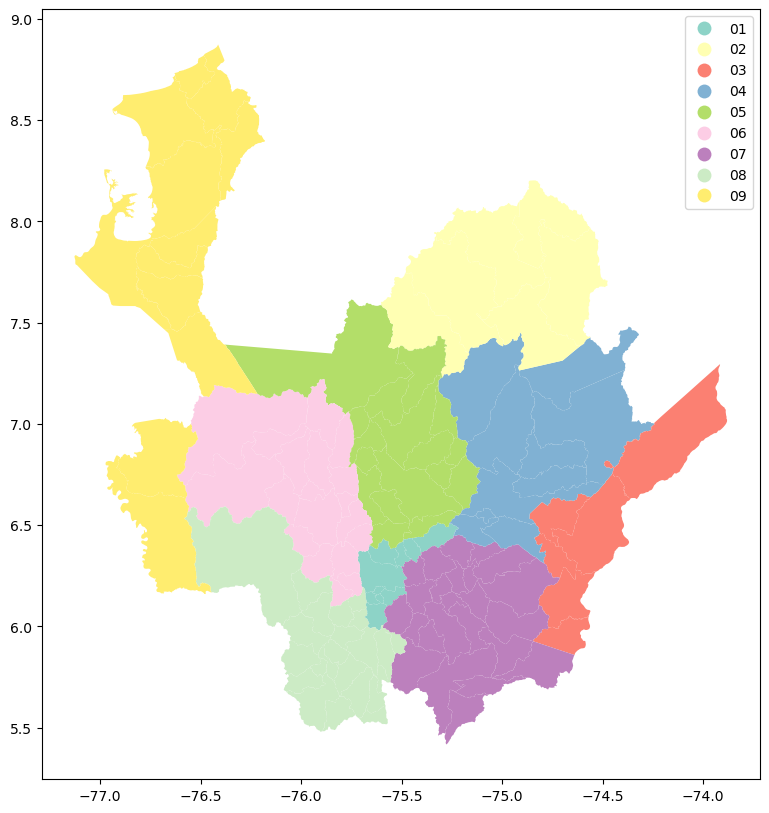

In [361]:
municipios_antioquia.plot(column="codigo_subregion", cmap="Set3", legend=True, figsize=(10, 10))

In [362]:
subregion = {'03': 'MAGDALENA MEDIO',
 '02': 'BAJO CAUCA',
 '09': 'URABA',
 '04': 'NORDESTE',
 '06': 'OCCIDENTE',
 '05': 'NORTE',
 '07': 'ORIENTE',
 '08': 'SUROESTE',
 '01': 'VALLE DE ABURRA'}
subregion_antioquia = municipios_antioquia.dissolve(by="codigo_subregion", as_index=False)
subregion_antioquia["codigo_subregion"] = subregion_antioquia["codigo_subregion"].astype(str).str.zfill(2)
subregion_antioquia["nombre_subregion"] = subregion_antioquia["codigo_subregion"].apply(lambda x: f"{subregion[x]}")
subregion_antioquia = subregion_antioquia[["codigo_subregion", "nombre_subregion", "geometry"]]
print(subregion_antioquia.crs)
print(subregion_antioquia.head())

subregion_antioquia.to_file("Data/processed/areas_subregion_antioquia.geojson", driver="GeoJSON")

EPSG:4326
  codigo_subregion nombre_subregion  \
0               01  VALLE DE ABURRA   
1               02       BAJO CAUCA   
2               03  MAGDALENA MEDIO   
3               04         NORDESTE   
4               05            NORTE   

                                            geometry  
0  POLYGON ((-75.57241 6.09957, -75.57319 6.09909...  
1  POLYGON ((-75.16579 7.35527, -75.16599 7.35485...  
2  POLYGON ((-74.57163 6.03452, -74.57021 6.02705...  
3  POLYGON ((-74.8388 6.51013, -74.83874 6.51016,...  
4  POLYGON ((-75.48834 6.43038, -75.48941 6.43067...  


<Axes: >

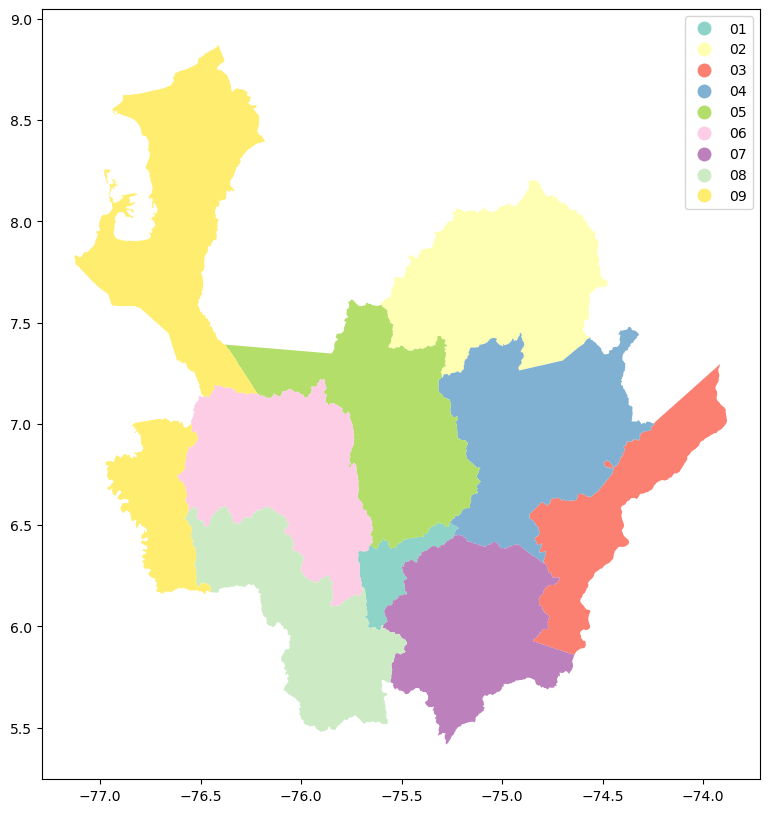

In [363]:
subregion_antioquia.plot(column="codigo_subregion", cmap="Set3", legend=True, figsize=(10, 10))

<Axes: >

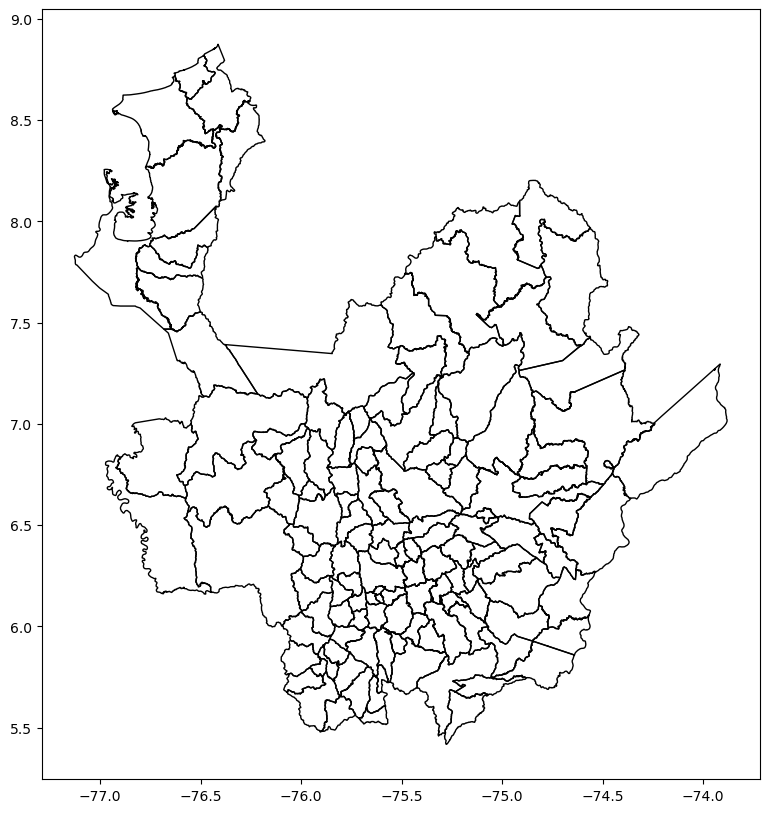

In [364]:
municipios_antioquia.plot(figsize=(10, 10), edgecolor='black', facecolor='none')

In [365]:
centroids = municipios_antioquia.copy()
centroids["geometry"] = municipios_antioquia.geometry.centroid
centroids["longitude"] = centroids.geometry.x
centroids["latitude"] = centroids.geometry.y
centroids = centroids.set_geometry("geometry")
centroids = centroids[["codigo_subregion","codigo_municipio", "nombre_municipio","area_municipio", "longitude", "latitude", "geometry"]]
print(centroids.crs)

centroids.to_file("Data/Processed/centroids_municipios_antioquia.geojson", driver='GeoJSON')


EPSG:4326


/var/folders/nq/kj34bm5140bgwbktdx1z94cm0000gn/T/ipykernel_4132/2803608674.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [366]:
centroids.info()
centroids.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   codigo_subregion  125 non-null    object  
 1   codigo_municipio  125 non-null    object  
 2   nombre_municipio  125 non-null    object  
 3   area_municipio    125 non-null    float64 
 4   longitude         125 non-null    float64 
 5   latitude          125 non-null    float64 
 6   geometry          125 non-null    geometry
dtypes: float64(3), geometry(1), object(3)
memory usage: 7.0+ KB


codigo_subregion codigo_municipio nombre_municipio  area_municipio  \
0               01            05001         MEDELLIN      374.834005   
1               07            05002        ABEJORRAL      507.141095   
2               06            05004         ABRIAQUI      296.894050   
3               07            05021       ALEJANDRIA      128.932153   
4               08            05030            AMAGA       84.132477   

   longitude  latitude                   geometry  
0 -75.611036  6.257588  POINT (-75.61104 6.25759)  
1 -75.438474  5.803729  POINT (-75.43847 5.80373)  
2 -76.085978  6.627547  POINT (-76.08598 6.62755)  
3 -75.090597  6.365534   POINT (-75.0906 6.36553)  
4 -75.708003  6.032922    POINT (-75.708 6.03292)

In [367]:
import pandas as pd

In [372]:
covid19_antioquia = pd.read_csv("Data/Processed/covid19_antioquia.csv")
covid19_antioquia["codigo_municipio"] = covid19_antioquia["codigo_municipio"].astype(str).str.zfill(5)
covid19_antioquia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955271 entries, 0 to 955270
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   fecha_reporte        955271 non-null  object
 1   codigo_municipio     955271 non-null  object
 2   edad                 955271 non-null  int64 
 3   sexo                 955271 non-null  object
 4   muertes_covid19      955271 non-null  int64 
 5   recuperados_covid19  955271 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 43.7+ MB


In [376]:
# Filter and aggregate COVID-19 data by municipio
covid19_by_mpio_antioquia = covid19_antioquia.groupby(["codigo_municipio"])[["muertes_covid19", "recuperados_covid19"]].sum().reset_index()

covid19_by_mpio_antioquia.info()
covid19_by_mpio_antioquia.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_municipio     125 non-null    object
 1   muertes_covid19      125 non-null    int64 
 2   recuperados_covid19  125 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ KB


codigo_municipio  muertes_covid19  recuperados_covid19
0            05001            10354               537729
1            05002               24                  579
2            05004                1                   78
3            05021                6                  176
4            05030               54                 1440

In [379]:
poblacion_mpios_antioquia = pd.read_csv("Data/Processed/poblacion_mpios_antioquia.csv")
poblacion_mpios_antioquia["codigo_municipio"] = poblacion_mpios_antioquia["codigo_municipio"].astype(str).str.zfill(5)
poblacion_mpios_antioquia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigo_municipio  125 non-null    object 
 1   nombre_municipio  125 non-null    object 
 2   nombre_subregion  125 non-null    object 
 3   codigo_subregion  125 non-null    int64  
 4   poblacion         125 non-null    int64  
 5   hombres           125 non-null    int64  
 6   mujeres           125 non-null    int64  
 7   altitud           125 non-null    float64
 8   temperatura       125 non-null    float64
 9   humedad_relativa  125 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 9.9+ KB


In [387]:
points_covid19_antioquia = centroids.merge(
    poblacion_mpios_antioquia[[
        "codigo_municipio", 
        "poblacion", 
        "altitud", 
        "temperatura", 
        "humedad_relativa"
        ]], on="codigo_municipio", how="left")

points_covid19_antioquia = points_covid19_antioquia.merge(
    covid19_by_mpio_antioquia, on="codigo_municipio", how="left"
)
points_covid19_antioquia["densidad"] = points_covid19_antioquia["poblacion"] / points_covid19_antioquia["area_municipio"]

points_covid19_antioquia["cfr"] = (points_covid19_antioquia["muertes_covid19"] / (points_covid19_antioquia["muertes_covid19"] + points_covid19_antioquia["recuperados_covid19"])) * 100

points_covid19_antioquia.to_file("Data/Processed/points_covid19_antioquia.geojson", driver='GeoJSON')


In [386]:
points_covid19_antioquia.head()

codigo_subregion codigo_municipio nombre_municipio  area_municipio  \
0               01            05001         MEDELLIN      374.834005   
1               07            05002        ABEJORRAL      507.141095   
2               06            05004         ABRIAQUI      296.894050   
3               07            05021       ALEJANDRIA      128.932153   
4               08            05030            AMAGA       84.132477   

   longitude  latitude                   geometry  poblacion      altitud  \
0 -75.611036  6.257588  POINT (-75.61104 6.25759)    2616335  2059.003077   
1 -75.438474  5.803729  POINT (-75.43847 5.80373)      21468  1947.128522   
2 -76.085978  6.627547  POINT (-76.08598 6.62755)       2855  2371.335448   
3 -75.090597  6.365534   POINT (-75.0906 6.36553)       4955  1545.100614   
4 -75.708003  6.032922    POINT (-75.708 6.03292)      32412  1513.740970   

   temperatura  humedad_relativa  muertes_covid19  recuperados_covid19  \
0    18.203481         80.582299            10354               537729   
1    17.845754         80.265871               24                  579   
2    15.912880         85.717115                1                   78   
3    20.538783         80.036523                6                  176   
4    21.093243         78.477931               54                 1440   

      densidad       cfr  
0  6979.983054  1.889130  
1    42.331415  3.980100  
2     9.616225  1.265823  
3    38.431065  3.296703  
4   385.249562  3.614458

In [388]:
print(points_covid19_antioquia.describe())

       area_municipio   longitude    latitude     poblacion      altitud  \
count      125.000000  125.000000  125.000000  1.250000e+02   125.000000   
mean       502.455862  -75.548747    6.545337  5.522977e+04  1402.070910   
std        586.093207    0.524995    0.674237  2.394113e+05   714.811220   
min         15.659283  -76.723803    5.555265  2.855000e+03    57.921900   
25%        143.646022  -75.850351    6.057469  9.020000e+03   925.024037   
50%        257.948769  -75.583304    6.423464  1.698400e+04  1496.997554   
75%        540.814988  -75.194570    6.861576  3.219200e+04  1996.637240   
max       2921.874435  -74.158241    8.707148  2.616335e+06  2797.154219   

       temperatura  humedad_relativa  muertes_covid19  recuperados_covid19  \
count   125.000000        125.000000        125.00000           125.000000   
mean     21.016742         80.519797        149.49600          7457.176000   
std       3.587705          4.885657        933.43455         48690.689336   
min

### Create Geodataframe

# 4. Exploratory Data Analysis

Para efectos del análisis de eventos, se construye una variable binaria que indica la ocurrencia de un evento crítico. Esta toma el valor de 1 si la tasa de letalidad (CFR) supera el umbral del 3% y 0 en caso contrario.

In [390]:
points_covid19_cfr3 = gpd.read_file('Data/Processed/points_covid19_antioquia.geojson')

points_covid19_cfr3["evento_CFR"] = points_covid19_cfr3["cfr"].apply(lambda x: 1 if x > 3 else 0)

points_covid19_cfr3 = points_covid19_cfr3[["codigo_subregion", "codigo_municipio", "poblacion", "area_municipio", "altitud", "temperatura", "humedad_relativa", "muertes_covid19", "recuperados_covid19", "densidad", "evento_CFR", "longitude", "latitude", "geometry"]]
points_covid19_cfr3.to_file('Data/Processed/points_covid19_cfr3.geojson', driver='GeoJSON')
points_covid19_cfr3.info()
points_covid19_cfr3.evento_CFR.value_counts()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   codigo_subregion     125 non-null    object  
 1   codigo_municipio     125 non-null    object  
 2   poblacion            125 non-null    int32   
 3   area_municipio       125 non-null    float64 
 4   altitud              125 non-null    float64 
 5   temperatura          125 non-null    float64 
 6   humedad_relativa     125 non-null    float64 
 7   muertes_covid19      125 non-null    int32   
 8   recuperados_covid19  125 non-null    int32   
 9   densidad             125 non-null    float64 
 10  evento_CFR           125 non-null    int64   
 11  longitude            125 non-null    float64 
 12  latitude             125 non-null    float64 
 13  geometry             125 non-null    geometry
dtypes: float64(7), geometry(1), int32(3), int64(1), object(2)
memory u

evento_CFR
0    67
1    58
Name: count, dtype: int64

In [11]:
# Filtrar los municipios con CFR > 3% evento_CFR == 1
points_covid19_cfr3_1 = points_covid19_cfr3[points_covid19_cfr3["evento_CFR"] == 1]
points_covid19_cfr3_1.to_file('Data/Processed/points_covid19_cfr3_1.geojson', driver='GeoJSON')

## Point Pattern Analysis

In [35]:
%pip install descartes
%pip install pysal
%pip install contextily shapely


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
%matplotlib inline

import descartes
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal
import seaborn as sbn
import contextily as ctx
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [10]:
points_covid19_antioquia = gpd.read_file('Data/Processed/points_covid19_antioquia.geojson')
municipios_antioquia = gpd.read_file('Data/Processed/areas_municipios_antioquia.geojson')
subregion_antioquia = gpd.read_file('Data/Processed/areas_subregion_antioquia.geojson')
points_covid19_cfr3 = gpd.read_file('Data/Processed/points_covid19_cfr3.geojson')
points_covid19_cfr3_1 = gpd.read_file('Data/Processed/points_covid19_cfr3_1.geojson')

## Visualization

#### Dots on Map

<Axes: >

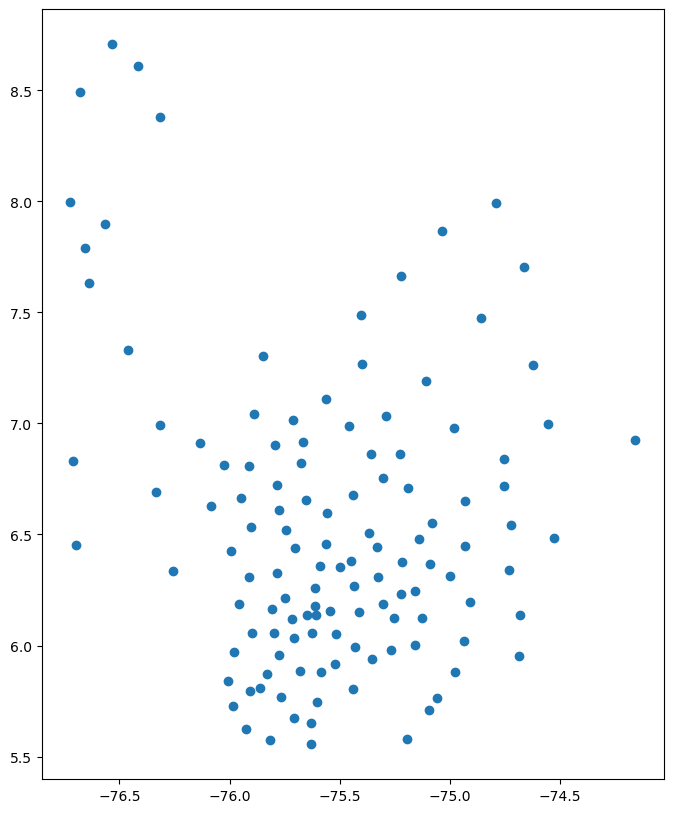

In [13]:
# Todos los municipios de Antioquia
points_covid19_antioquia.plot(figsize=(10, 10))

##### Municipios con CFR > 3 

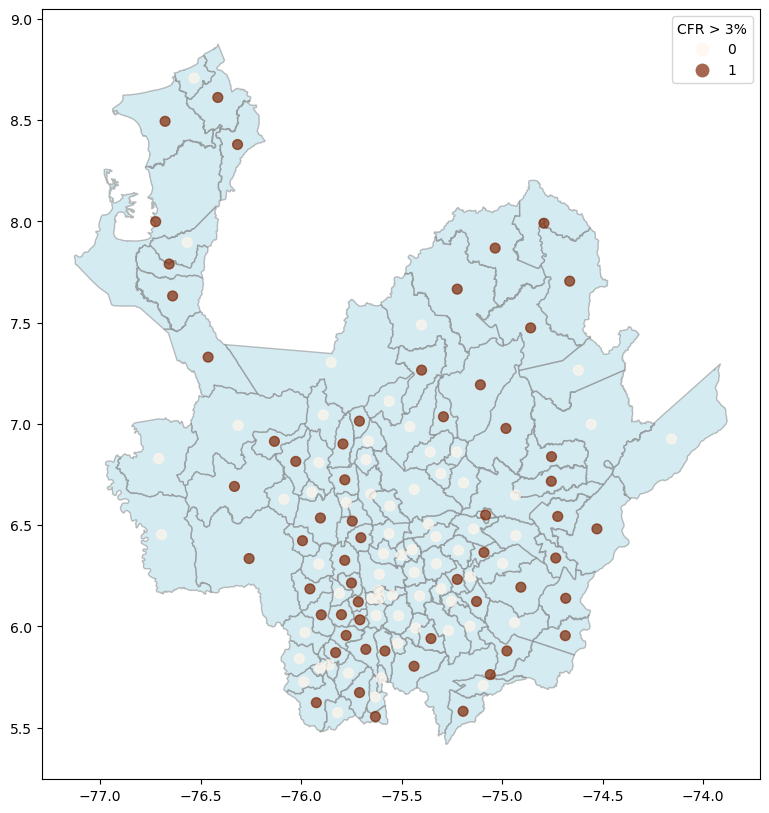

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
municipios_antioquia.plot(ax=ax, color='lightblue', edgecolor='grey', alpha=0.5)
points_covid19_cfr3.plot(
    ax=ax, column='evento_CFR', categorical=True, legend=True,
    legend_kwds={'title': 'CFR > 3%'},
    cmap='Oranges', markersize=50, alpha=0.7
)
plt.show()

##### Subregiones con CFR > 3

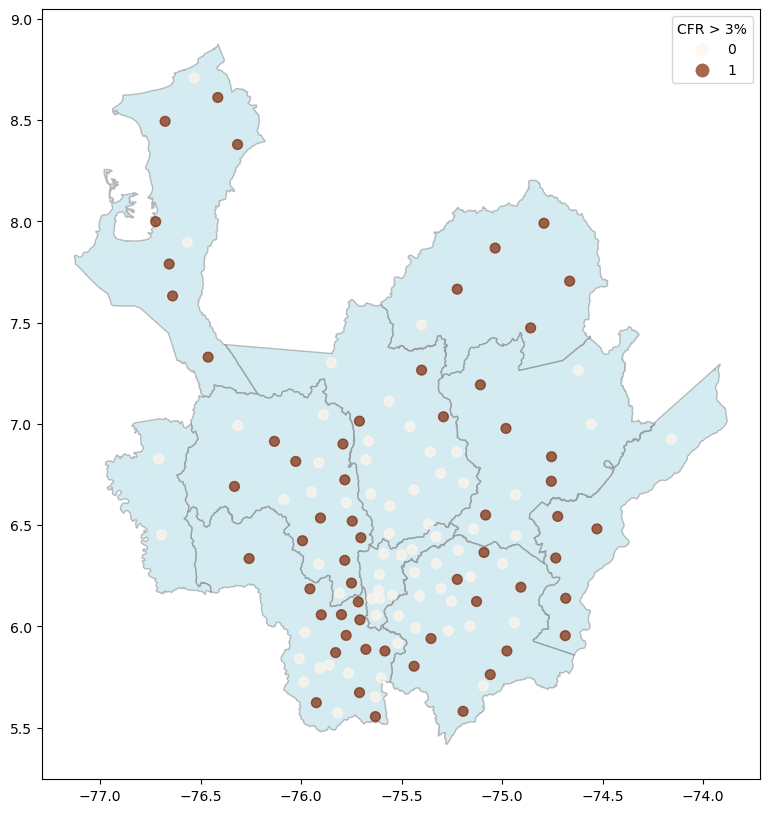

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
subregion_antioquia.plot(ax=ax, color='lightblue', edgecolor='grey', alpha=0.5)
points_covid19_cfr3.plot(
    ax=ax, column='evento_CFR', categorical=True, legend=True,
    legend_kwds={'title': 'CFR > 3%'},
    cmap='Oranges', markersize=50, alpha=0.7
)
plt.show()

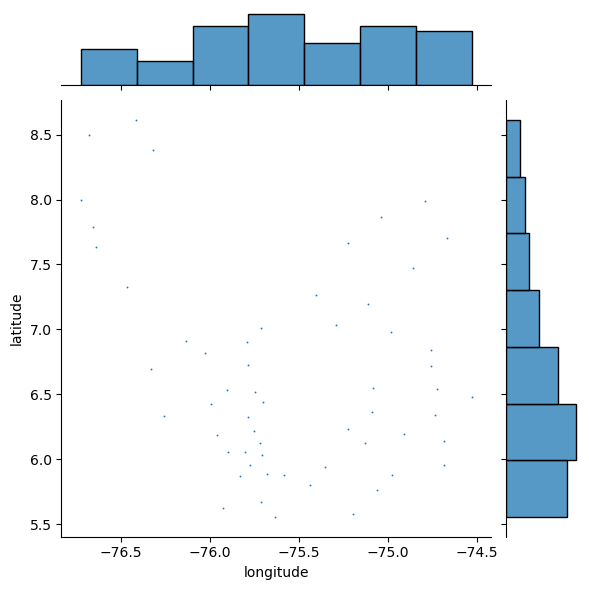

In [17]:
# Generate scatter plot
sbn.jointplot(x='longitude', y='latitude', data=points_covid19_cfr3_1, s=2)

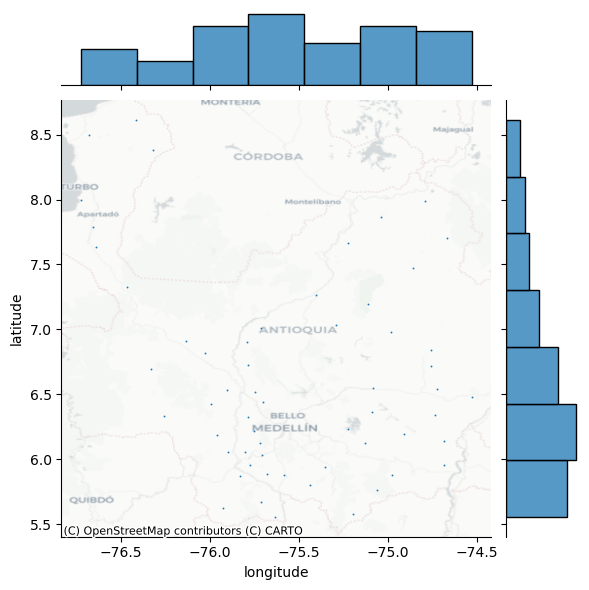

In [20]:
import contextily as ctx 
joint_axes = sbn.jointplot(x='longitude', y='latitude', data=points_covid19_cfr3_1, s=2)
ctx.add_basemap(joint_axes.ax_joint, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

### Irregular lattices

Usaremos las areas de las subregiones para determinar la intensidad de puntos en las zonas

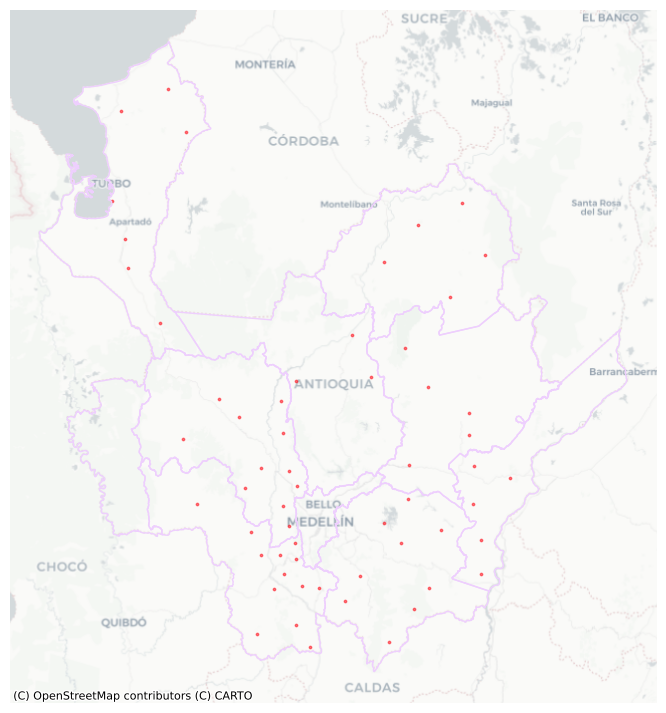

In [21]:

ax = points_covid19_cfr3_1.plot.scatter("longitude","latitude",s=3,c="xkcd:bright red",alpha=0.5,figsize=(9, 9))

subregion_antioquia.plot(ax=ax,facecolor="none",edgecolor="xkcd:pale lavender")

ax.set_axis_off()

ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

Determinar cuantos municipios con CFR > 3 por subregion 

In [22]:
mpios_cfr3_1_by_subregion = points_covid19_cfr3_1.groupby("codigo_subregion").size()

subregiones = subregion_antioquia.merge(mpios_cfr3_1_by_subregion.rename("mpios_cfr3_by_subregion"), left_on="codigo_subregion", right_index=True, how="left")


In [23]:
subregiones.mpios_cfr3_by_subregion.describe()

count     8.000000
mean      7.250000
std       3.453776
min       3.000000
25%       5.000000
50%       6.000000
75%       9.500000
max      13.000000
Name: mpios_cfr3_by_subregion, dtype: float64

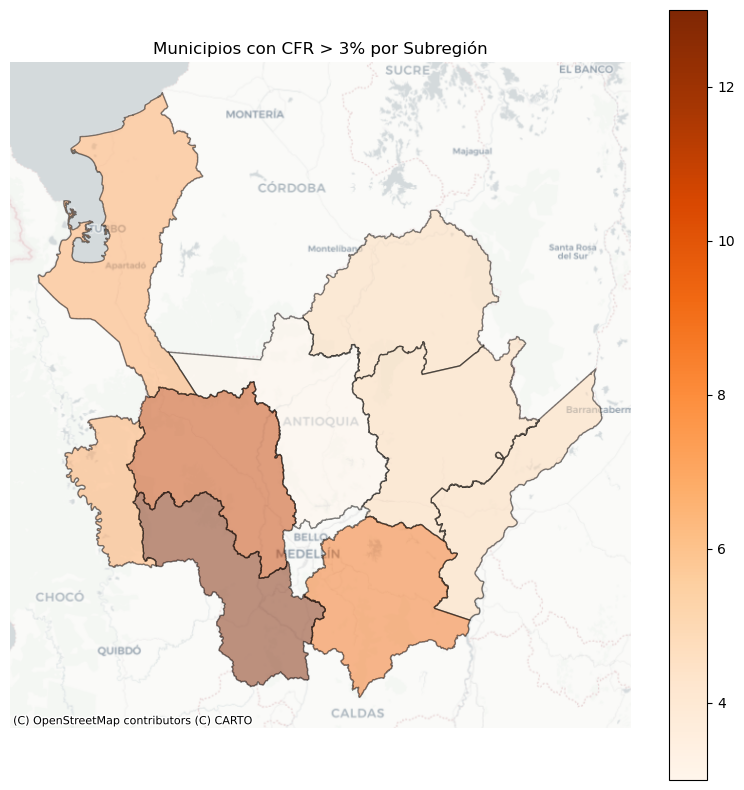

In [24]:

fig, ax = plt.subplots(figsize=(10, 10))
subregiones.plot(ax=ax, column='mpios_cfr3_by_subregion', legend=True, cmap='Oranges', edgecolor='black', alpha=0.5)
ax.set_title('Municipios con CFR > 3% por Subregión')
ax.set_axis_off()
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
plt.show()  


### Regular lattices: Hex-binning

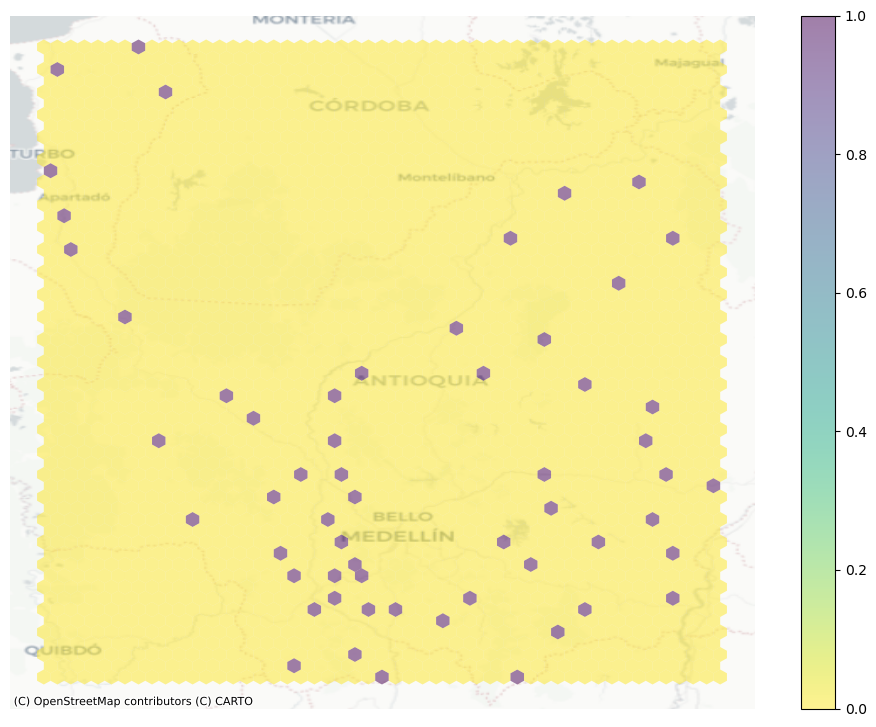

In [29]:

f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add hexbin with 50 hexagons in each dimension, no borderlines, half transparency, and the reverse viridis colormap
hb = ax.hexbin(
    points_covid19_cfr3_1['longitude'], 
    points_covid19_cfr3_1['latitude'],
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)

ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

### Kernel Density Estimation (KDE)

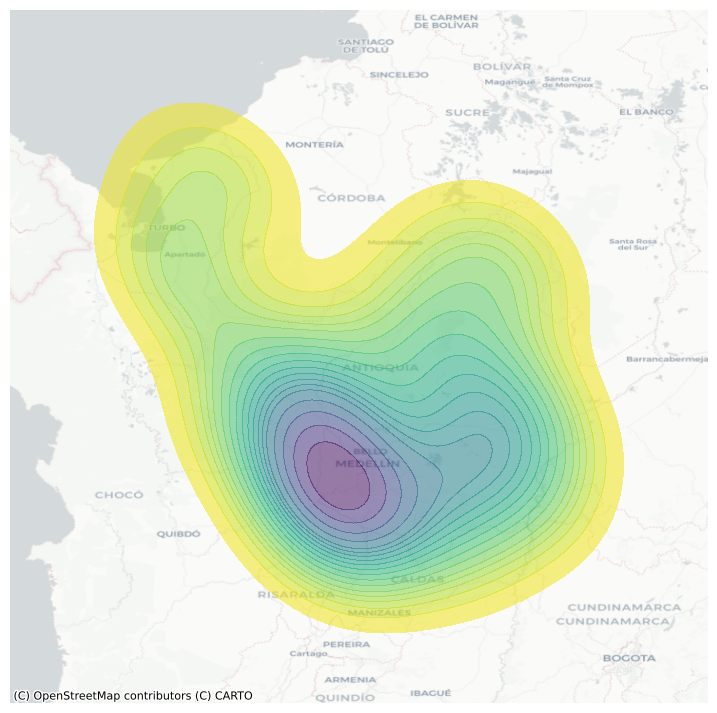

In [30]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# sbn.kdeplot(db['x'],db['y'],n_levels=30,shade=True,alpha=0.55,cmap='viridis_r')
sbn.kdeplot(x=points_covid19_cfr3_1['longitude'], y=points_covid19_cfr3_1['latitude'], levels=20, fill=True, alpha=0.55, cmap='viridis_r')

# Add basemap
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
# Remove axes
ax.set_axis_off()

## Centrography

### Tendency

In [18]:
from pointpats import centrography

In [19]:
mean_center = centrography.mean_center(points_covid19_cfr3_1[['longitude', 'latitude']])
med_center = centrography.euclidean_median(points_covid19_cfr3_1[['longitude', 'latitude']])

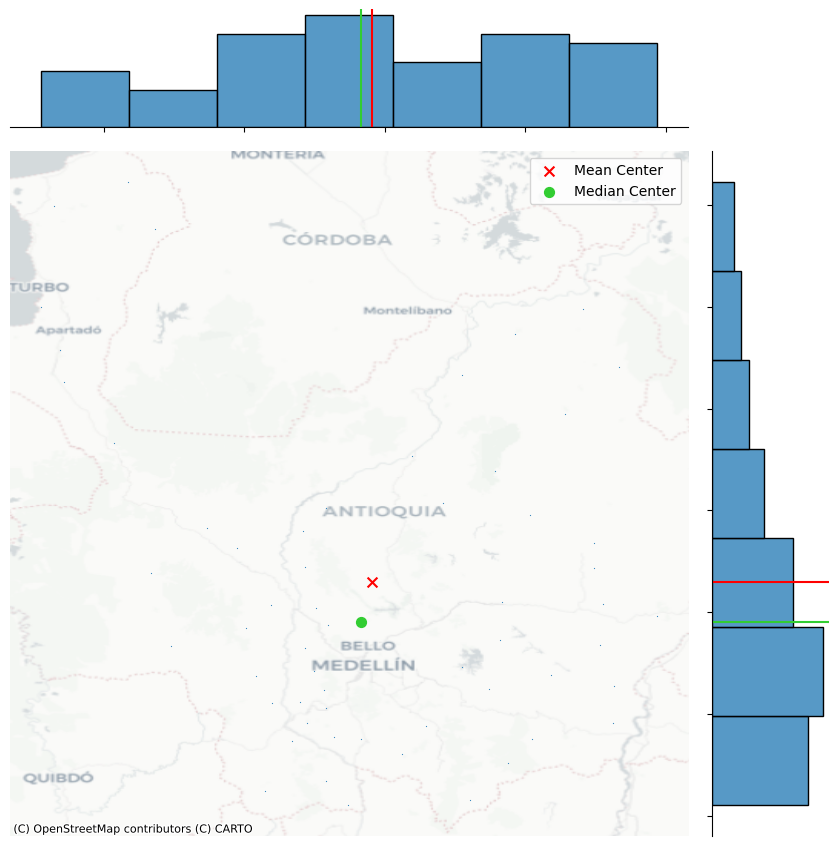

In [41]:
# Generate scatter plot
joint_axes = sbn.jointplot(x='longitude', y='latitude',data=points_covid19_cfr3_1,s=0.75,height=9)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(*med_center, color='limegreen', marker='o', s=50, label='Median Center')
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()
# Add basemap
# ctx.add_basemap(joint_axes.ax_joint,source=ctx.providers.CartoDB.Positron)
ctx.add_basemap(joint_axes.ax_joint, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

### Dispersion

In [21]:
centrography.std_distance(points_covid19_cfr3_1[['longitude','latitude']])

np.float64(0.9753835550561795)

### Standard deviational ellipse

In [22]:
major, minor, rotation = centrography.ellipse(points_covid19_cfr3_1[['longitude','latitude']])

In [23]:
major

np.float64(0.7840363917636705)

In [24]:
minor

np.float64(1.0009044428123037)

In [25]:
import numpy as np 

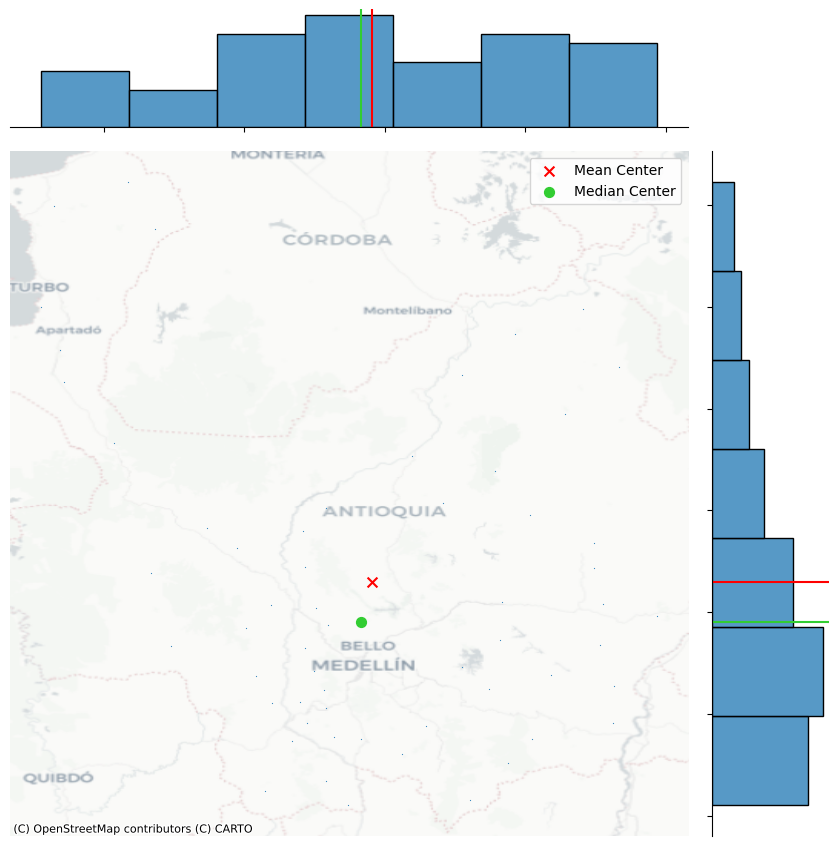

In [42]:
# Generate scatter plot
joint_axes = sbn.jointplot(x='longitude', y='latitude',data=points_covid19_cfr3_1,s=0.75,height=9)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(*med_center, color='limegreen', marker='o', s=50, label='Median Center')
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()
# Add basemap
ctx.add_basemap(joint_axes.ax_joint, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

### Extent

In [43]:
coordinates = points_covid19_cfr3_1[['longitude', 'latitude']].values


In [44]:
coordinates

array([[-75.43847449,   5.80372897],
       [-75.09059702,   6.36553412],
       [-75.7080031 ,   6.03292199],
       [-74.98127311,   6.97769068],
       [-75.92459671,   5.62395126],
       [-75.71594966,   6.1214303 ],
       [-75.10848962,   7.19311041],
       [-75.90426747,   6.53570773],
       [-76.41478301,   8.61138712],
       [-75.95649246,   6.18578361],
       [-75.22369249,   7.66515825],
       [-75.99351498,   6.42346364],
       [-75.29224952,   7.03542947],
       [-76.02689633,   6.81495037],
       [-74.73354817,   6.33797388],
       [-75.63081024,   5.55526547],
       [-76.65668414,   7.78916729],
       [-75.03501878,   7.86794983],
       [-76.63964213,   7.63166564],
       [-75.08253096,   6.55008115],
       [-75.90014678,   6.05746868],
       [-75.78331099,   6.32645515],
       [-74.66427699,   7.70463362],
       [-75.67837372,   5.88716956],
       [-76.33198554,   6.69136668],
       [-75.12763646,   6.12338072],
       [-75.7497221 ,   6.21452562],
 

In [45]:
convex_hull_vertices = centrography.hull(coordinates)

In [46]:
convex_hull_vertices

array([[-74.68620541,   5.95483902],
       [-74.5287421 ,   6.48192227],
       [-74.66427699,   7.70463362],
       [-74.79242149,   7.99046768],
       [-76.41478301,   8.61138712],
       [-76.67699198,   8.4937355 ],
       [-76.72380317,   7.99837236],
       [-76.63964213,   7.63166564],
       [-76.25906482,   6.33534134],
       [-75.92459671,   5.62395126],
       [-75.63081024,   5.55526547],
       [-75.19457019,   5.58127531]])

In [47]:
import libpysal
alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(coordinates, return_circles=True)

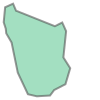

In [32]:
alpha_shape

/var/folders/nq/kj34bm5140bgwbktdx1z94cm0000gn/T/ipykernel_1025/1518267742.py:38: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


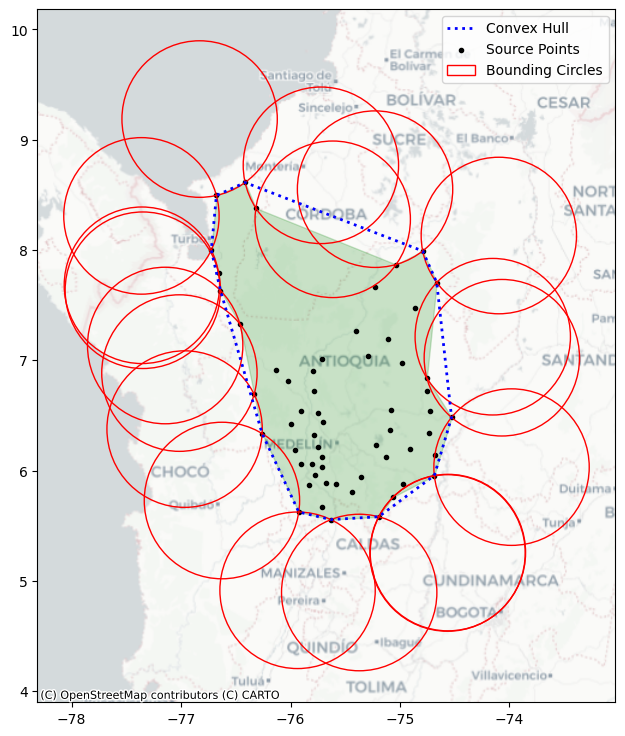

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Polygon

# Crear GeoSeries para alpha shape y convex hull
gdf_alpha = gpd.GeoSeries([alpha_shape], crs="EPSG:4326")
gdf_hull = gpd.GeoSeries([Polygon(convex_hull_vertices)], crs="EPSG:4326")  # Asegúrate que convex_hull_vertices sea válida

# Crear figura y ejes
f, ax = plt.subplots(1, 1, figsize=(16, 9))

# Plot alpha shape en verde semitransparente
gdf_alpha.plot(ax=ax, color='green', alpha=0.2, edgecolor='green', label='Tightest single alpha shape')

# Plot convex hull como contorno azul punteado
gdf_hull.boundary.plot(ax=ax, color='blue', linestyle=':', linewidth=2, label='Convex Hull')

# Plot puntos fuente
ax.scatter(*coordinates.T, color='k', marker='.', label='Source Points')

# Dibujar círculos
for i, circle in enumerate(circs):
    label = 'Bounding Circles' if i == 0 else None
    ax.add_patch(
        plt.Circle(
            circle, 
            radius=alpha, 
            facecolor='none', 
            edgecolor='r', 
            label=label
        )
    )

# Añadir basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs="EPSG:4326")

plt.legend()
plt.show()


/var/folders/nq/kj34bm5140bgwbktdx1z94cm0000gn/T/ipykernel_1025/2679096729.py:38: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


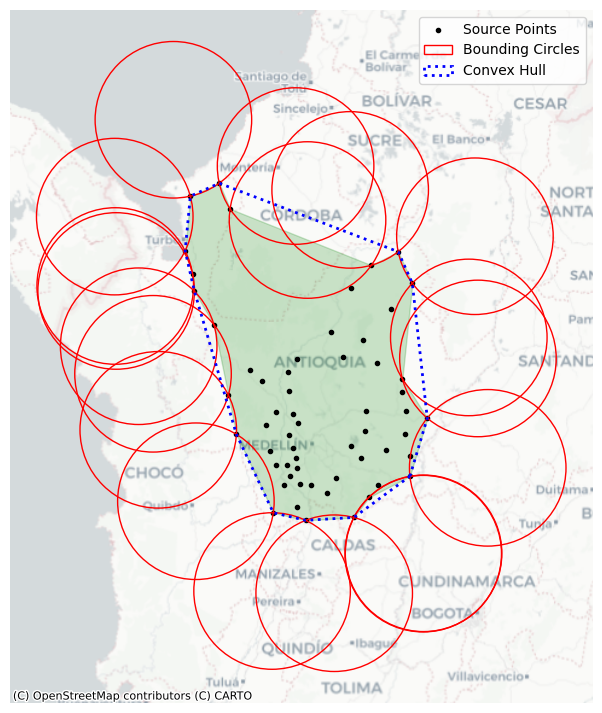

In [51]:
import geopandas as gpd

# Convert the alpha shape polygon to GeoDataFrame
alpha_gdf = gpd.GeoDataFrame(geometry=[alpha_shape], crs="EPSG:3857")  # Use your projection

# Plot setup
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Plot alpha shape
alpha_gdf.plot(ax=ax, edgecolor='green', facecolor='green', alpha=0.2, label='Tightest single alpha shape')

# Plot source points
ax.scatter(*coordinates.T, color='k', marker='.', label='Source Points')

# Plot circles
for i, circle in enumerate(circs):
    label = 'Bounding Circles' if i == 0 else None
    ax.add_patch(
        plt.Circle(circle, radius=alpha, facecolor='none', edgecolor='r', label=label)
    )

# Plot convex hull
ax.add_patch(
    plt.Polygon(
        convex_hull_vertices, closed=True,
        edgecolor='blue', facecolor='none',
        linestyle=':', linewidth=2, label='Convex Hull'
    )
)

# Basemap
import contextily as ctx
# ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron, crs=alpha_gdf.crs.to_string())

ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()
plt.legend()
plt.show()


In [52]:
min_rot_rect = centrography.minimum_rotated_rectangle(coordinates)

In [53]:
min_rect_vertices = centrography.minimum_bounding_rectangle(coordinates)

In [54]:
(center_x, center_y), radius = centrography.minimum_bounding_circle(coordinates)

/var/folders/nq/kj34bm5140bgwbktdx1z94cm0000gn/T/ipykernel_1025/1948423080.py:75: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


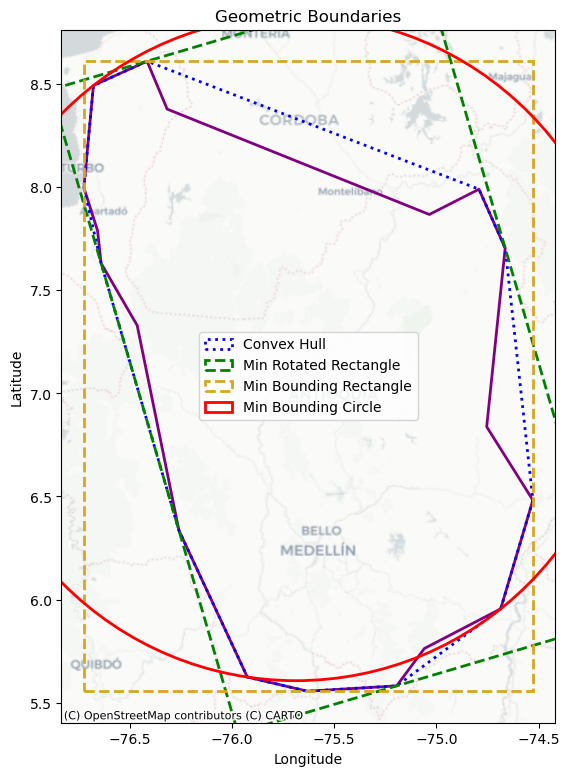

In [56]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as MplPolygon, Circle, Rectangle
import contextily as ctx

# Example input geometries (replace with your actual data)
# alpha_shape, convex_hull_vertices, min_rot_rect, center_x, center_y, radius, min_rect_vertices must be defined

# 1. GeoSeries for the alpha shape
gdf_alpha = gpd.GeoSeries([alpha_shape], crs="EPSG:4326")

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 9))

# Plot alpha shape in purple
gdf_alpha.plot(ax=ax, edgecolor='purple', facecolor='none', linewidth=2, label='Alpha Shape')

# 2. Convex hull patch (blue)
convex_patch = MplPolygon(
    convex_hull_vertices, 
    closed=True,
    edgecolor='blue',
    facecolor='none',
    linestyle=':',
    linewidth=2,
    label='Convex Hull'
)
ax.add_patch(convex_patch)

# 3. Minimum rotated rectangle (green)
rot_rect_patch = MplPolygon(
    min_rot_rect,
    closed=True,
    edgecolor='green',
    facecolor='none',
    linestyle='--',
    linewidth=2,
    label='Min Rotated Rectangle'
)
ax.add_patch(rot_rect_patch)

# 4. Minimum bounding rectangle (goldenrod dashed)
xmin, ymin, xmax, ymax = min_rect_vertices
rect_width = xmax - xmin
rect_height = ymax - ymin

bbox_patch = Rectangle(
    (xmin, ymin),
    width=rect_width,
    height=rect_height,
    edgecolor='goldenrod',
    facecolor='none',
    linestyle='dashed',
    linewidth=2,
    label='Min Bounding Rectangle'
)
ax.add_patch(bbox_patch)

# 5. Minimum bounding circle (red)
circle_patch = Circle(
    (center_x, center_y),
    radius=radius,
    edgecolor='red',
    facecolor='none',
    linewidth=2,
    label='Min Bounding Circle'
)
ax.add_patch(circle_patch)

# Optional: add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs="EPSG:4326")

# Final touches
ax.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geometric Boundaries")
plt.show()


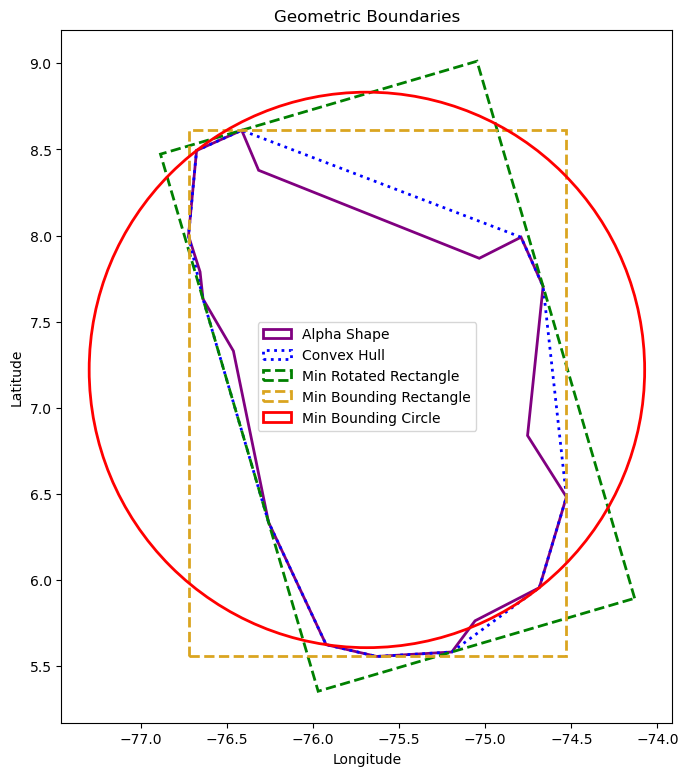

In [60]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle, Rectangle

# Assuming these variables are already defined:
# alpha_shape: shapely Polygon for alpha shape
# convex_hull_vertices: list/array of (x, y) for convex hull polygon
# min_rot_rect: list/array of (x, y) for min rotated rectangle polygon
# min_rect_vertices: tuple (xmin, ymin, xmax, ymax)
# center_x, center_y: center of minimum bounding circle
# radius: radius of minimum bounding circle

# Create matplotlib patches without descartes
alpha_shape_patch = Polygon(
    list(alpha_shape.exterior.coords),
    closed=True,
    edgecolor='purple',
    facecolor='none',
    linewidth=2,
    label='Alpha Shape'
)

convex_hull_patch = Polygon(
    convex_hull_vertices,
    closed=True,
    edgecolor='blue',
    facecolor='none',
    linestyle=':',
    linewidth=2,
    label='Convex Hull'
)

min_rot_rect_patch = Polygon(
    min_rot_rect,
    closed=True,
    edgecolor='green',
    facecolor='none',
    linestyle='--',
    linewidth=2,
    label='Min Rotated Rectangle'
)

xmin, ymin, xmax, ymax = min_rect_vertices
min_rect_width = xmax - xmin
min_rect_height = ymax - ymin

min_rect_patch = Rectangle(
    (xmin, ymin),
    width=min_rect_width,
    height=min_rect_height,
    edgecolor='goldenrod',
    facecolor='none',
    linestyle='dashed',
    linewidth=2,
    label='Min Bounding Rectangle'
)

circ_patch = Circle(
    (center_x, center_y),
    radius=radius,
    edgecolor='red',
    facecolor='none',
    linewidth=2,
    label='Min Bounding Circle'
)

# Plotting
fig, ax = plt.subplots(figsize=(12, 9))

# Add patches
for patch in [alpha_shape_patch, convex_hull_patch, min_rot_rect_patch, min_rect_patch, circ_patch]:
    ax.add_patch(patch)

# Optional: add points here if you want, e.g.:
# ax.scatter(longitudes, latitudes, color='black', marker='.', label='Points')

ax.set_aspect('equal')
ax.autoscale()

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Geometric Boundaries")

ax.legend()
plt.show()


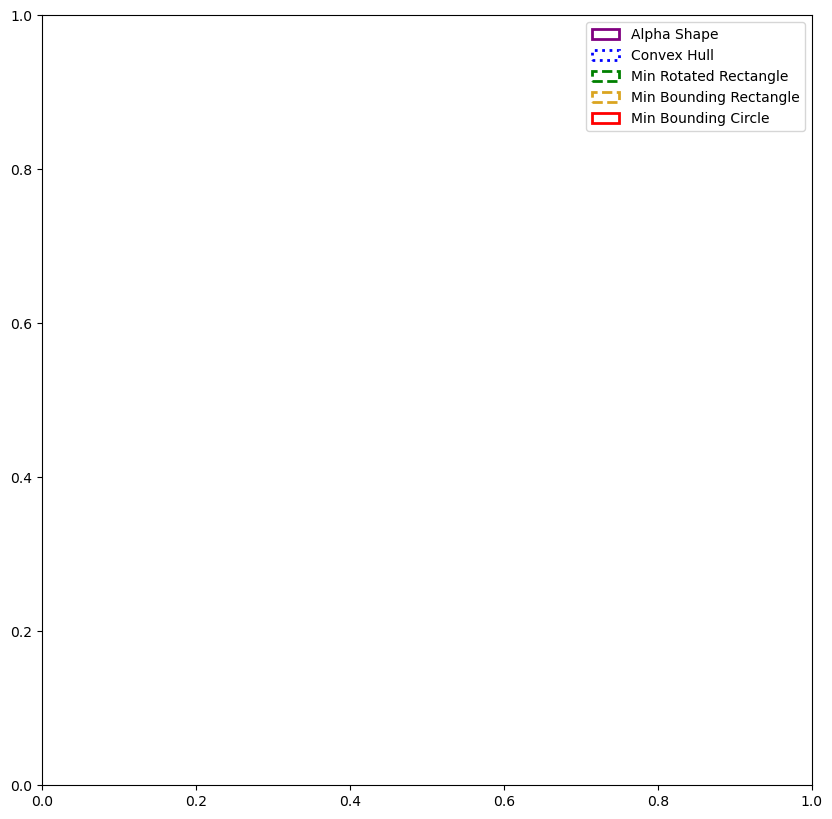

In [62]:
from matplotlib.patches import Polygon as MplPolygon, Circle, Rectangle
import matplotlib.pyplot as plt

# Alpha shape patch
alpha_shape_patch = MplPolygon(
    list(alpha_shape.exterior.coords),
    closed=True,
    edgecolor='purple',
    facecolor='none',
    linewidth=2,
    label='Alpha Shape'
)

# Convex hull patch
convex_hull_patch = MplPolygon(
    convex_hull_vertices, 
    closed=True, 
    edgecolor='blue', 
    facecolor='none', 
    linestyle=':', 
    linewidth=2,
    label='Convex Hull'
)

# Min rotated rectangle patch
min_rot_rect_patch = MplPolygon(
    min_rot_rect, 
    closed=True, 
    edgecolor='green', 
    facecolor='none', 
    linestyle='--', 
    linewidth=2,
    label='Min Rotated Rectangle'
)

# Unpack min bounding rectangle corners (xmin, ymin, xmax, ymax)
xmin, ymin, xmax, ymax = min_rect_vertices

min_rect_width = xmax - xmin
min_rect_height = ymax - ymin

min_rect_patch = Rectangle(
    (xmin, ymin),
    width=min_rect_width,
    height=min_rect_height,
    edgecolor='goldenrod',
    facecolor='none',
    linestyle='dashed',
    linewidth=2,
    label='Min Bounding Rectangle'
)

# Min bounding circle patch
circ_patch = Circle(
    (center_x, center_y), 
    radius=radius,
    edgecolor='red', 
    facecolor='none', 
    linewidth=2,
    label='Min Bounding Circle'
)

# Plot everything
fig, ax = plt.subplots(figsize=(10,10))

ax.add_patch(alpha_shape_patch)
ax.add_patch(convex_hull_patch)
ax.add_patch(min_rot_rect_patch)
ax.add_patch(min_rect_patch)
ax.add_patch(circ_patch)

# Set equal aspect ratio
ax.set_aspect('equal')

# Add legend
ax.legend()

plt.show()


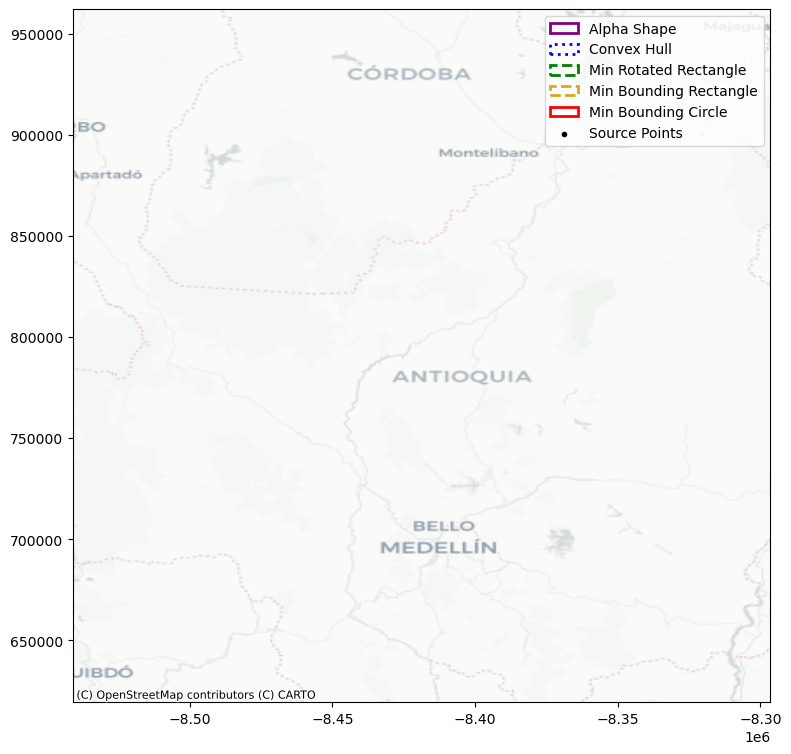

In [66]:
from matplotlib.patches import Polygon as MplPolygon, Circle, Rectangle


alpha_shape_patch = MplPolygon(
    list(alpha_shape.exterior.coords),
    closed=True,
    edgecolor='purple',
    facecolor='none',
    linewidth=2,
    label='Alpha Shape'
)

# === CONVEX HULL ===
convex_hull_patch = MplPolygon(
    convex_hull_vertices, 
    closed=True, 
    edgecolor='blue', 
    facecolor='none', 
    linestyle=':', 
    linewidth=2,
    label='Convex Hull'
)

# === MINIMUM ROTATED RECTANGLE ===
min_rot_rect_patch = MplPolygon(
    min_rot_rect, 
    closed=True, 
    edgecolor='green', 
    facecolor='none', 
    linestyle='--', 
    linewidth=2,
    label='Min Rotated Rectangle'
)

# === MINIMUM BOUNDING RECTANGLE (AXIS-ALIGNED) ===
# Assuming min_rect_vertices is a tuple: (x_min, y_min, x_max, y_max)
x_min, y_min, x_max, y_max = min_rect_vertices
min_rect_width = x_max - x_min
min_rect_height = y_max - y_min

min_rect_patch = Rectangle(
    (x_min, y_min), 
    width=min_rect_width,
    height=min_rect_height,
    edgecolor='goldenrod', 
    facecolor='none', 
    linestyle='dashed', 
    linewidth=2, 
    label='Min Bounding Rectangle'
)

# === MINIMUM BOUNDING CIRCLE ===
circ_patch = Circle(
    (center_x, center_y), 
    radius=radius,
    edgecolor='red', 
    facecolor='none', 
    linewidth=2,
    label='Min Bounding Circle'
)

# === PLOTTING ===
fig, ax = plt.subplots(figsize=(9, 9))
ax.add_patch(alpha_shape_patch)
ax.add_patch(convex_hull_patch)
ax.add_patch(min_rot_rect_patch)
ax.add_patch(min_rect_patch)
ax.add_patch(circ_patch)

# Plot source points
ax.scatter(*coordinates.T, color='k', marker='.', label='Source Points')

# Add basemap (requires contextily and web-mercator projection)
import contextily as ctx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Convert points to GeoDataFrame with correct CRS
gdf = gpd.GeoDataFrame(
    geometry=[Point(xy) for xy in coordinates],
    crs="EPSG:4326"
).to_crs(epsg=3857)

# Reproject axis to match basemap
ax.set_xlim(gdf.total_bounds[[0, 2]])
ax.set_ylim(gdf.total_bounds[[1, 3]])

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.legend()
plt.show()


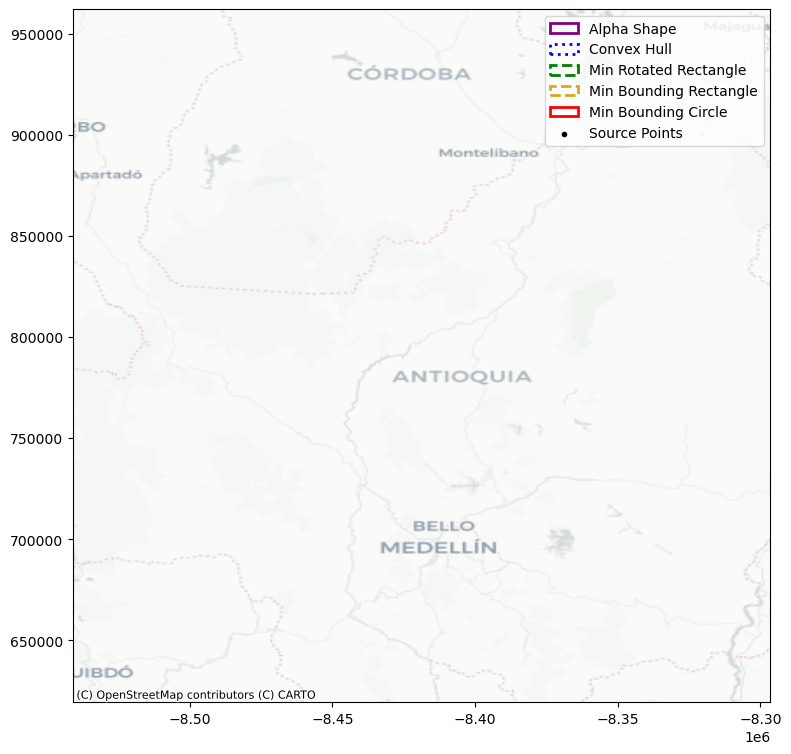

In [68]:
from matplotlib.patches import Polygon as MplPolygon, Circle, Rectangle


# === ALPHA SHAPE ===
alpha_shape_patch = MplPolygon(
    list(alpha_shape.exterior.coords),
    closed=True,
    edgecolor='purple',
    facecolor='none',
    linewidth=2,
    label='Alpha Shape'
)
# === CONVEX HULL ===
convex_hull_patch = MplPolygon(
    convex_hull_vertices, 
    closed=True, 
    edgecolor='blue', 
    facecolor='none', 
    linestyle=':', 
    linewidth=2,
    label='Convex Hull'
)

# === MINIMUM ROTATED RECTANGLE ===
min_rot_rect_patch = MplPolygon(
    min_rot_rect, 
    closed=True, 
    edgecolor='green', 
    facecolor='none', 
    linestyle='--', 
    linewidth=2,
    label='Min Rotated Rectangle'
)

# === MINIMUM BOUNDING RECTANGLE (AXIS-ALIGNED) ===
# Assuming min_rect_vertices is a tuple: (x_min, y_min, x_max, y_max)
x_min, y_min, x_max, y_max = min_rect_vertices
min_rect_width = x_max - x_min
min_rect_height = y_max - y_min

min_rect_patch = Rectangle(
    (x_min, y_min), 
    width=min_rect_width,
    height=min_rect_height,
    edgecolor='goldenrod', 
    facecolor='none', 
    linestyle='dashed', 
    linewidth=2, 
    label='Min Bounding Rectangle'
)

# === MINIMUM BOUNDING CIRCLE ===
circ_patch = Circle(
    (center_x, center_y), 
    radius=radius,
    edgecolor='red', 
    facecolor='none', 
    linewidth=2,
    label='Min Bounding Circle'
)

# === PLOTTING ===
fig, ax = plt.subplots(figsize=(9, 9))
ax.add_patch(alpha_shape_patch)
ax.add_patch(convex_hull_patch)
ax.add_patch(min_rot_rect_patch)
ax.add_patch(min_rect_patch)
ax.add_patch(circ_patch)

# Plot source points
ax.scatter(*coordinates.T, color='k', marker='.', label='Source Points')

# Add basemap (requires contextily and web-mercator projection)
import contextily as ctx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Convert points to GeoDataFrame with correct CRS
gdf = gpd.GeoDataFrame(
    geometry=[Point(xy) for xy in coordinates],
    crs="EPSG:4326"
).to_crs(epsg=3857)

# Reproject axis to match basemap
ax.set_xlim(gdf.total_bounds[[0, 2]])
ax.set_ylim(gdf.total_bounds[[1, 3]])

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.legend()
plt.show()


RuntimeError: Can not put single artist in more than one figure

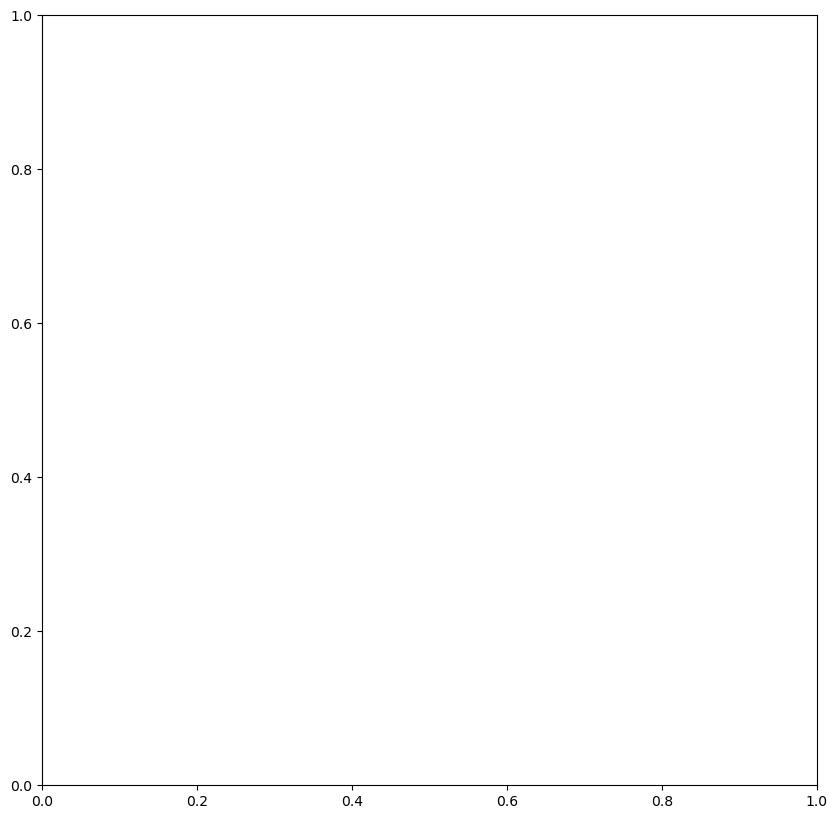

In [71]:
import geopandas as gpd
from shapely.geometry import Point
import pyproj
from shapely.ops import transform
import contextily as ctx

# Helper: reproject a shapely geometry to EPSG:3857
def to_web_mercator(geom):
    project = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True).transform
    return transform(project, geom)

# Reproject your shapely-based geometries (polygons, rectangles, etc.)
alpha_shape_patch.set_xy([to_web_mercator(Point(x, y)).coords[0] for x, y in alpha_shape_patch.get_xy()])
convex_hull_patch.set_xy([to_web_mercator(Point(x, y)).coords[0] for x, y in convex_hull_patch.get_xy()])
min_rot_rect_patch.set_xy([to_web_mercator(Point(x, y)).coords[0] for x, y in min_rot_rect_patch.get_xy()])
min_rect_patch.set_xy(to_web_mercator(Point(*min_rect_patch.get_xy())).coords[0])
circ_patch.set_center(to_web_mercator(Point(*circ_patch.get_center())).coords[0])

# Reproject your point data to EPSG:3857
gdf_all = gpd.GeoDataFrame(geometry=gpd.points_from_xy(points_covid19_cfr3.longitude, points_covid19_cfr3.latitude), crs="EPSG:4326").to_crs(epsg=3857)
gdf_red = gpd.GeoDataFrame(geometry=gpd.points_from_xy(points_covid19_cfr3_1.longitude, points_covid19_cfr3_1.latitude), crs="EPSG:4326").to_crs(epsg=3857)

# Plot
f, ax = plt.subplots(1, figsize=(10, 10))

ax.add_patch(alpha_shape_patch)
ax.add_patch(convex_hull_patch)
ax.add_patch(min_rot_rect_patch)
ax.add_patch(min_rect_patch)
ax.add_patch(circ_patch)

gdf_all.plot(ax=ax, markersize=.75, color='grey')
gdf_red.plot(ax=ax, markersize=100, color='r', marker='x')

ax.legend(ncol=1, loc='center left')

# Set bounds to data
ax.set_xlim(*gdf_all.total_bounds[[0, 2]])
ax.set_ylim(*gdf_all.total_bounds[[1, 3]])

# Add basemap
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.Positron)

plt.show()


RuntimeError: Can not put single artist in more than one figure

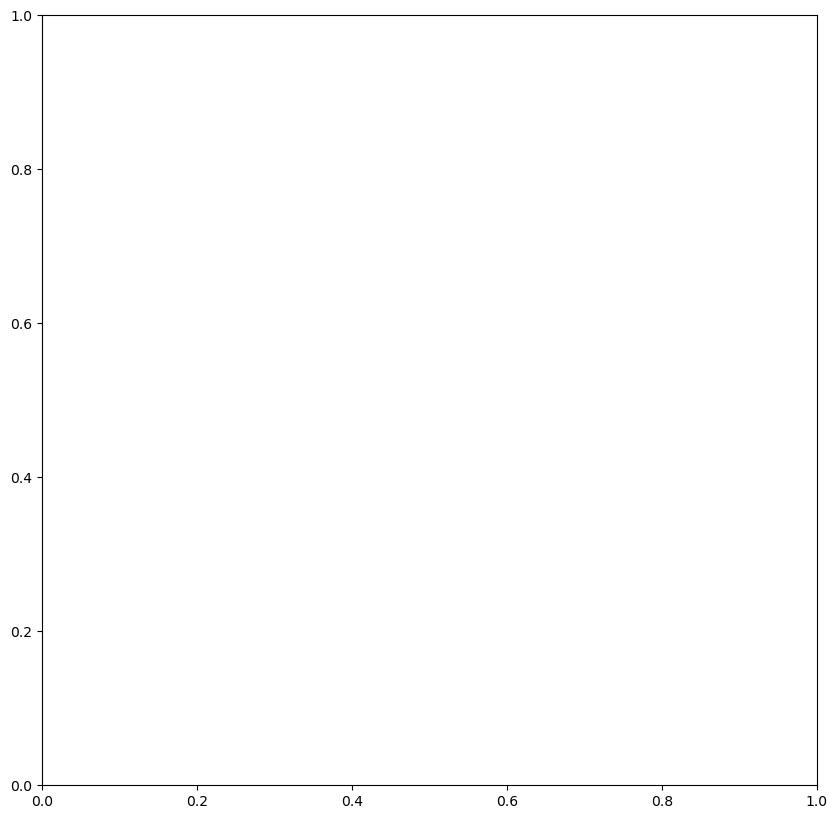

In [70]:
f,ax = plt.subplots(1, figsize=(10,10))

ax.add_patch(alpha_shape_patch)
ax.add_patch(convex_hull_patch)
ax.add_patch(min_rot_rect_patch)
ax.add_patch(min_rect_patch)
ax.add_patch(circ_patch)

ax.scatter(points_covid19_cfr3.longitude, points_covid19_cfr3.latitude, s=.75, color='grey')
ax.scatter(points_covid19_cfr3_1.longitude, points_covid19_cfr3_1.latitude, s=100, color='r', marker='x')
ax.legend(ncol=1, loc='center left')

# Add basemap
ctx.add_basemap(
    ax, crs="EPSG:4326",
    source=ctx.providers.CartoDB.Positron
)
plt.show()

## Randomness & clustering

In [72]:
from pointpats import distance_statistics, QStatistic, random, PointPattern

In [73]:
coordinates

array([[-75.43847449,   5.80372897],
       [-75.09059702,   6.36553412],
       [-75.7080031 ,   6.03292199],
       [-74.98127311,   6.97769068],
       [-75.92459671,   5.62395126],
       [-75.71594966,   6.1214303 ],
       [-75.10848962,   7.19311041],
       [-75.90426747,   6.53570773],
       [-76.41478301,   8.61138712],
       [-75.95649246,   6.18578361],
       [-75.22369249,   7.66515825],
       [-75.99351498,   6.42346364],
       [-75.29224952,   7.03542947],
       [-76.02689633,   6.81495037],
       [-74.73354817,   6.33797388],
       [-75.63081024,   5.55526547],
       [-76.65668414,   7.78916729],
       [-75.03501878,   7.86794983],
       [-76.63964213,   7.63166564],
       [-75.08253096,   6.55008115],
       [-75.90014678,   6.05746868],
       [-75.78331099,   6.32645515],
       [-74.66427699,   7.70463362],
       [-75.67837372,   5.88716956],
       [-76.33198554,   6.69136668],
       [-75.12763646,   6.12338072],
       [-75.7497221 ,   6.21452562],
 

In [74]:
random_pattern = random.poisson(coordinates, size=len(coordinates))

/usr/local/Caskroom/miniforge/base/envs/geo/lib/python3.11/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


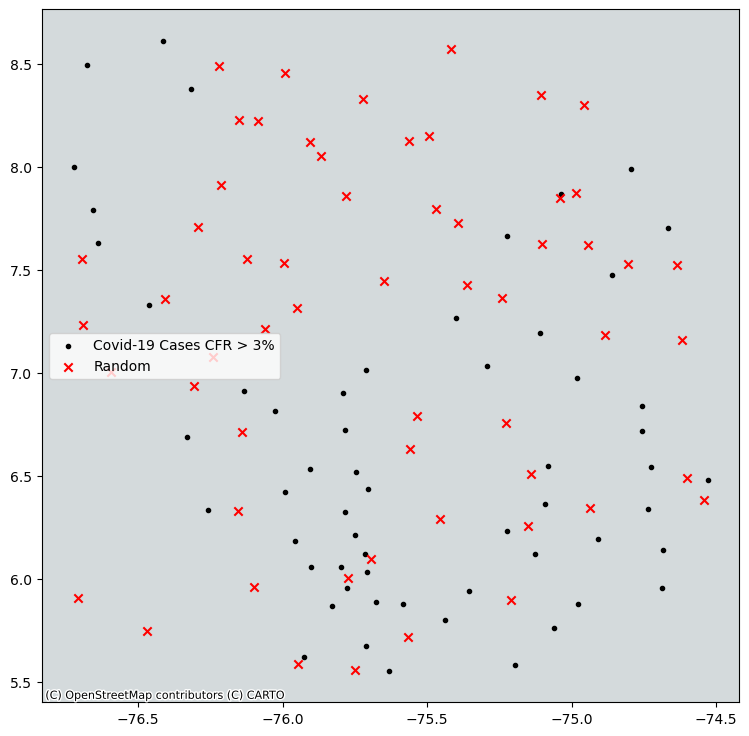

In [75]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color='k', marker='.', label='Covid-19 Cases CFR > 3%')
plt.scatter(*random_pattern.T, color='r', marker='x', label='Random')
ctx.add_basemap(
    ax, 
    source=ctx.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()

In [76]:
random_pattern_ashape = random.poisson(alpha_shape, size=len(coordinates))

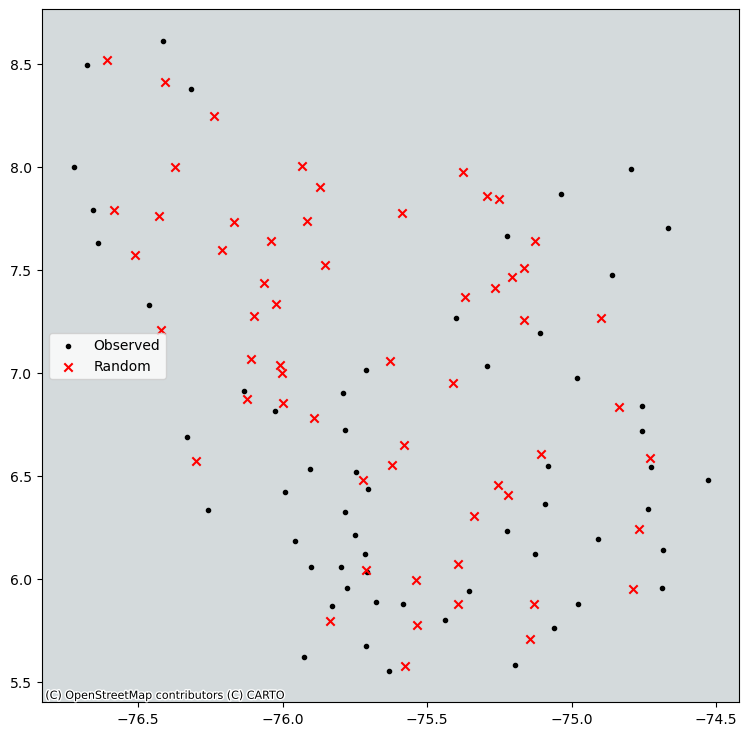

In [77]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed')
plt.scatter(*random_pattern_ashape.T, color='r', marker='x', label='Random')
ctx.add_basemap(
    ax, 
    source=ctx.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()

### Quadrat Statistics

<Axes: title={'center': 'Quadrat Count'}>

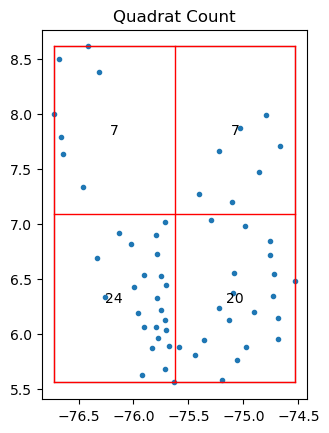

In [79]:
qstat = QStatistic(coordinates, nx = 2, ny = 2)
qstat.plot()

In [80]:
qstat.chi2_pvalue

np.float64(0.001097656029624474)

<Axes: title={'center': 'Quadrat Count'}>

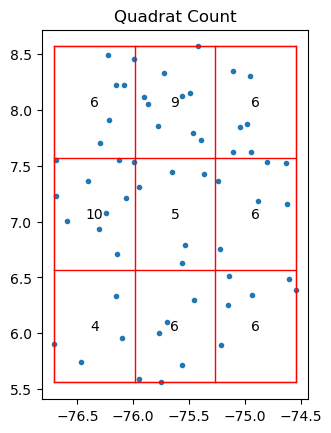

In [81]:
qstat_null = QStatistic(random_pattern)
qstat_null.plot()

In [82]:
qstat_null.chi2_pvalue

np.float64(0.8213827711054319)

<Axes: title={'center': 'Quadrat Count'}>

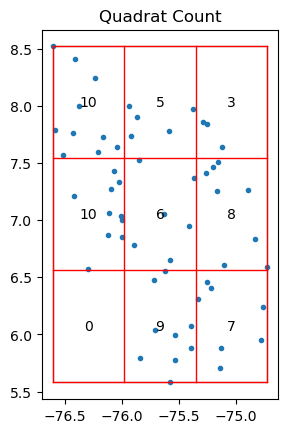

In [83]:
qstat_null_ashape = QStatistic(random_pattern_ashape)
qstat_null_ashape.plot()

In [84]:
qstat_null_ashape.chi2_pvalue

np.float64(0.0817654162447216)

### Ripley's alphabet of functions

In [92]:
import numpy as np

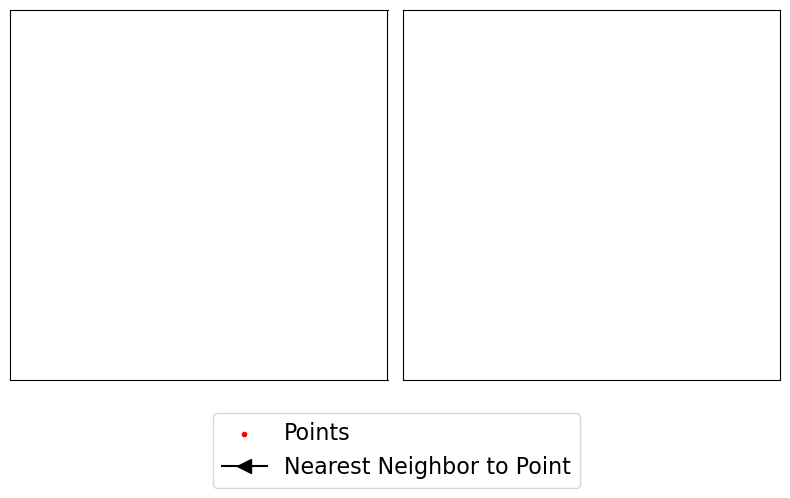

In [86]:
# this code should be hidden in the book, and only the plot visible!
f,ax = plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)
ax[0].scatter(*random_pattern.T, color='red')
ax[1].scatter(*random_pattern.T, color='red',
              zorder=100, marker='.', label='Points')
nn_ixs, nn_ds = PointPattern(random_pattern).knn(1)
first = True
for coord, nn_ix, nn_d in zip(random_pattern, nn_ixs, nn_ds):
    dx, dy = random_pattern[nn_ix].squeeze() - coord
    arrow = ax[1].arrow(*coord, dx,dy, 
                length_includes_head=True, 
                overhang=0, head_length=300*3,
                head_width=300*3, width=50*3,
                linewidth=0, facecolor='k',
                head_starts_at_zero=False)
    if first:
        plt.plot((1e100, 1e101), (0,1), color='k', 
                 marker='<', markersize=10,
                 label='Nearest Neighbor to Point')
    first = False

ax[0].axis([1.554e7, 1.556e7, 4240000, 4260000])
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xticks([])
ax[0].set_yticks([])
f.tight_layout()
ax[1].legend(bbox_to_anchor = (.5,-.06), fontsize=16)
plt.show()

In [87]:
g_test = distance_statistics.g_test(coordinates, support=40, keep_simulations=True)

In [88]:
g_test

GtestResult(support=array([0.        , 0.00897337, 0.01794675, 0.02692012, 0.0358935 ,
       0.04486687, 0.05384025, 0.06281362, 0.071787  , 0.08076037,
       0.08973375, 0.09870712, 0.1076805 , 0.11665387, 0.12562725,
       0.13460062, 0.143574  , 0.15254737, 0.16152075, 0.17049412,
       0.1794675 , 0.18844087, 0.19741425, 0.20638762, 0.215361  ,
       0.22433437, 0.23330775, 0.24228112, 0.2512545 , 0.26022787,
       0.26920125, 0.27817462, 0.287148  , 0.29612137, 0.30509475,
       0.31406812, 0.3230415 , 0.33201487, 0.34098825, 0.34996162]), statistic=array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.12068966, 0.18965517, 0.18965517, 0.24137931,
       0.24137931, 0.39655172, 0.46551724, 0.53448276, 0.53448276,
       0.56896552, 0.63793103, 0.63793103, 0.67241379, 0.67241379,
       0.70689655, 0.74137931, 0.77586207, 0.79310345, 0.84482759,
       0.84482759, 0.89655172,

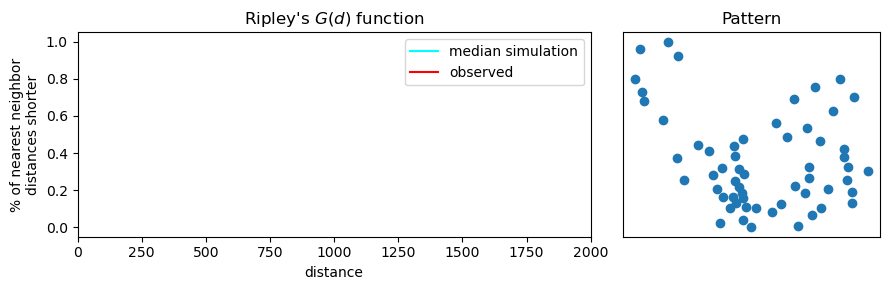

In [89]:
f,ax = plt.subplots(1,2,figsize=(9,3),gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, np.median(g_test.simulations, axis=0), color='cyan',label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

In [95]:
f_test = distance_statistics.f_test(coordinates, support=40, keep_simulations=True)

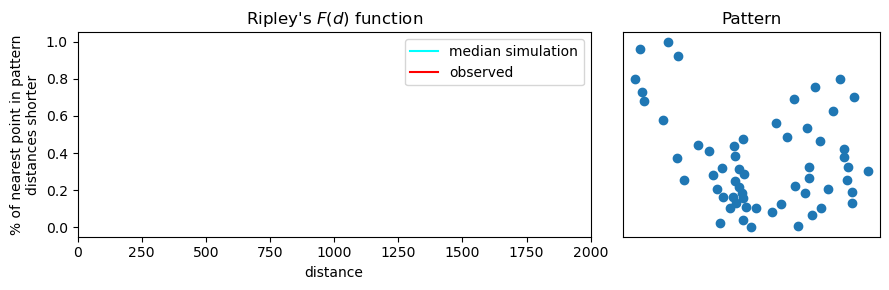

In [96]:
f,ax = plt.subplots(1,2,figsize=(9,3), gridspec_kw=dict(width_ratios=(6,3)))

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, np.median(f_test.simulations, axis=0), color='cyan',label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

## Identifying clusters

### DBSCAN clustering

In [97]:
from sklearn.cluster import DBSCAN

In [98]:
clusterer = DBSCAN()

clusterer.fit(points_covid19_cfr3_1[["longitude", "latitude"]])

DBSCAN()

In [99]:
# Print the first 5 elements of `cs`
clusterer.core_sample_indices_[:5]

array([0, 1, 2, 3, 4])

In [100]:
clusterer.labels_[:5]

array([0, 0, 0, 0, 0])

In [105]:
lbls = pd.Series(clusterer.labels_, index=points_covid19_cfr3_1.index)

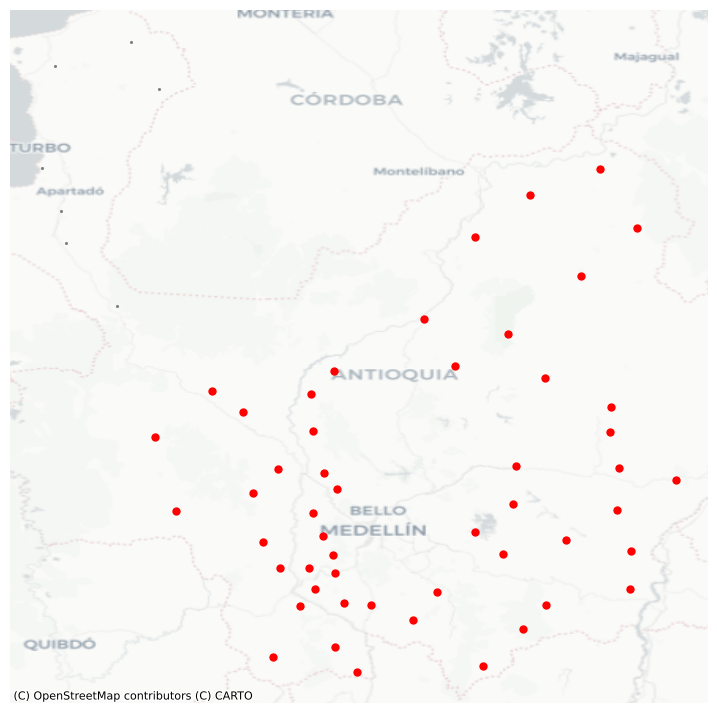

In [109]:

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = points_covid19_cfr3_1.loc[lbls==-1, ['longitude', 'latitude']]
# Plot noise in grey
ax.scatter(noise['longitude'], noise['latitude'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(points_covid19_cfr3_1.loc[points_covid19_cfr3_1.index.difference(noise.index), 'longitude'], \
           points_covid19_cfr3_1.loc[points_covid19_cfr3_1.index.difference(noise.index), 'latitude'], \
          c='red', linewidth=0)
# Add basemap
ctx.add_basemap(
    ax, crs="EPSG:4326",
    source=ctx.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

In [110]:
# Set up algorithm
algo = DBSCAN(eps=500, min_samples=10)
# Fit to Tokyo projected points
algo.fit(points_covid19_cfr3_1[["longitude", "latitude"]])
# Store labels
lbls = pd.Series(algo.labels_, index=points_covid19_cfr3_1.index)

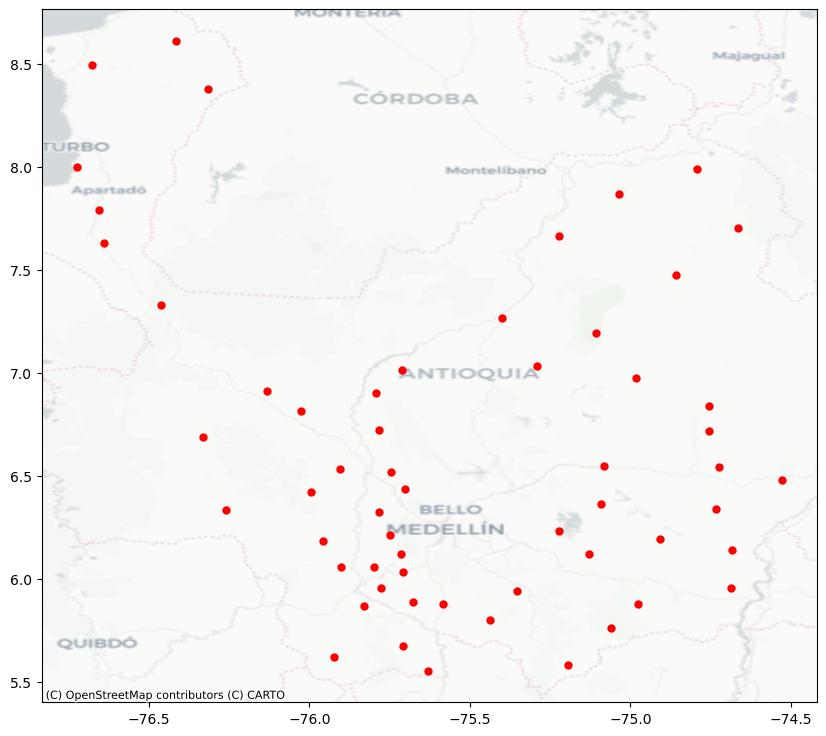

In [115]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(10, 9))
# Assign labels to tokyo table dynamically and
# subset points that are not part of any cluster (noise)
noise = points_covid19_cfr3_1.assign(lbls=lbls)\
             .query("lbls == -1")
# Plot noise in grey
ax.scatter(noise["longitude"], 
           noise["latitude"], 
           c='grey', 
           s=5, 
           linewidth=0
          )
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(points_covid19_cfr3_1.loc[points_covid19_cfr3_1.index.difference(noise.index), 
                     "longitude"
                    ], 
           points_covid19_cfr3_1.loc[points_covid19_cfr3_1.index.difference(noise.index), 
                     "latitude"
                    ],
           c="red", 
           linewidth=0
          )
ctx.add_basemap(
    ax, crs="EPSG:4326",
    source=ctx.providers.CartoDB.Positron
)
# Display the figure
plt.show()

In [116]:
# Obtain the number of points 1% of the total represents
minp = np.round(points_covid19_cfr3_1.shape[0] * 0.01)
minp

np.float64(1.0)

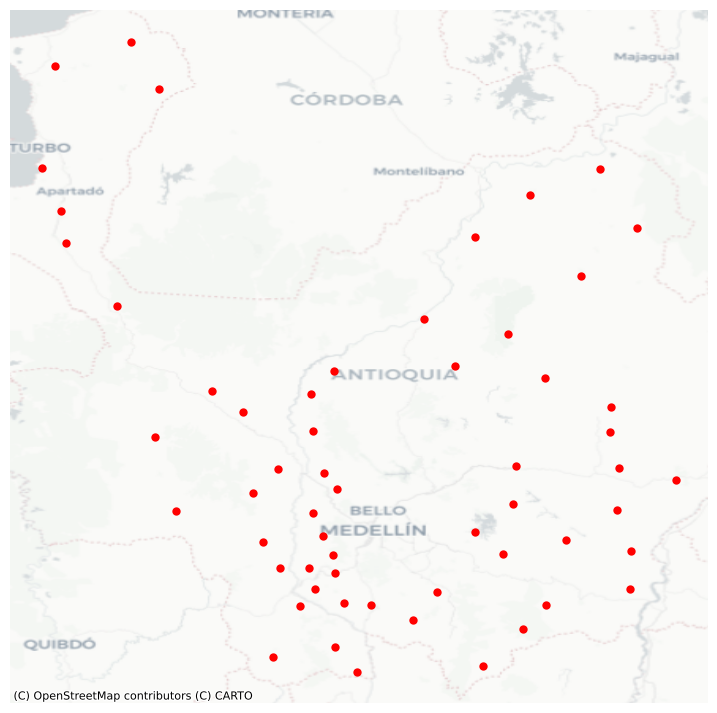

In [120]:
# Rerun DBSCAN
clusterer = DBSCAN(eps=500, min_samples=int(minp))
clusterer.fit(points_covid19_cfr3_1[['longitude', 'latitude']])
# Turn labels into a Series
lbls = pd.Series(clusterer.labels_, index=points_covid19_cfr3_1.index)
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = points_covid19_cfr3_1.loc[lbls==-1, ['longitude', 'latitude']]
# Plot noise in grey
ax.scatter(noise['longitude'], noise['latitude'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (points_covid19_cfr3_1) and substract from
#      it the index of those that are noise
ax.scatter(
    points_covid19_cfr3_1.loc[points_covid19_cfr3_1.index.difference(noise.index), 'longitude'],
    points_covid19_cfr3_1.loc[points_covid19_cfr3_1.index.difference(noise.index), 'latitude'],
    c='red', 
    linewidth=0
)
# Add basemap
ctx.add_basemap(
    ax, crs="EPSG:4326",
    source=ctx.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

In [129]:
def clusters(db, eps, min_samples):
    '''
    Compute and visualize DBSCAN clusters    
    ...
    
    Arguments
    ---------
    db          : (Geo)DataFrame
                  Table with at least columns `X` and `Y` for point coordinates
    eps         : float
                  Maximum radious to search for points within a cluster
    min_samples : int
                  Minimum number of points in a cluster
    '''
    algo = DBSCAN(eps=eps, min_samples=min_samples)
    algo.fit(db[['longitude', 'latitude']])
    lbls = pd.Series(algo.labels_, index=db.index)

    f, ax = plt.subplots(1, figsize=(9, 9))
    noise = db.loc[lbls==-1, ['longitude', 'latitude']]
    ax.scatter(noise['longitude'], noise['latitude'], c='grey', s=5, linewidth=0)
    ax.scatter(db.loc[db.index.difference(noise.index), 'longitude'], \
               db.loc[db.index.difference(noise.index), 'latitude'], \
              c='red', linewidth=0)
    return plt.show()

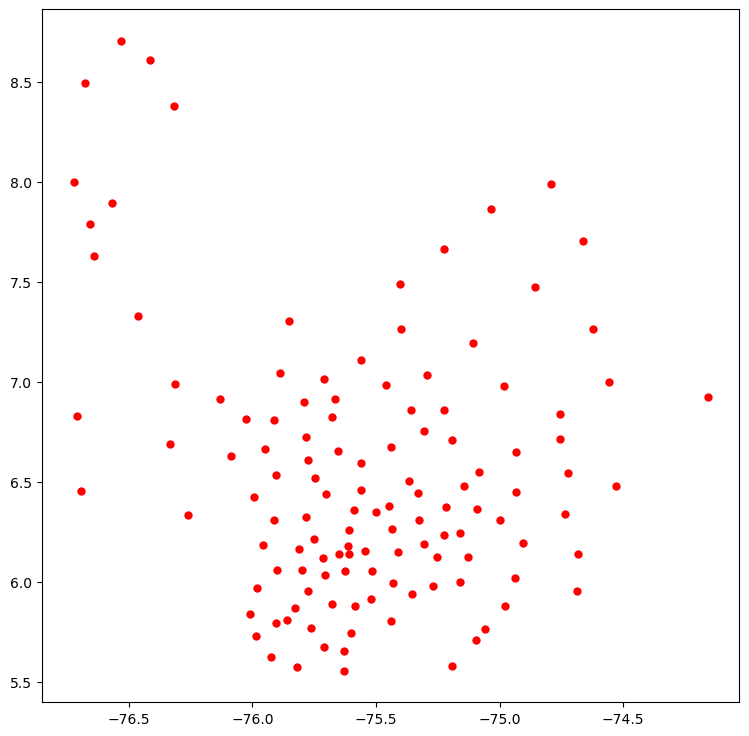

In [130]:
clusters(points_covid19_antioquia, 500, 10)

In [132]:
from ipywidgets import interact, fixed
interact(
    clusters,                 # Method to make interactive
    db=fixed(db),          # Data to pass on db (does not change)
    eps=(50, 500, 50),        # Range start/end/step of eps
    min_samples=(50, 300, 50) # Range start/end/step of min_samples
)

interactive(children=(IntSlider(value=250, description='eps', max=500, min=50, step=50), IntSlider(value=150, …

<function __main__.clusters(db, eps, min_samples)>

### Clustering as feature engineering

In [134]:
%pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [135]:
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import numpy as np

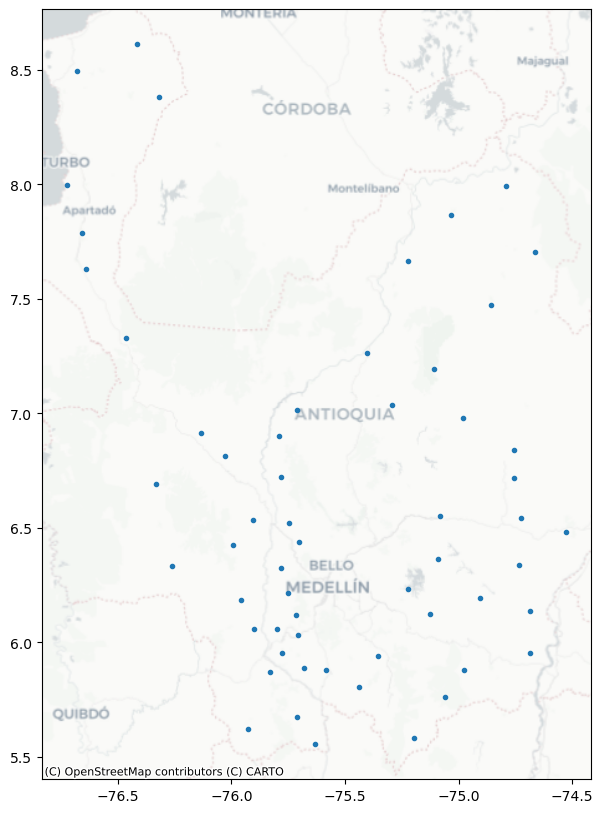

In [146]:
f,ax = plt.subplots(1,figsize=(12, 10))
points_covid19_cfr3_1.plot(ax=ax, marker='.')
ctx.add_basemap(ax, crs=points_covid19_cfr3_1.crs.to_string(), source=ctx.providers.CartoDB.Positron)



In [139]:
labels = HDBSCAN(min_cluster_size=25).fit(coordinates).labels_

/usr/local/Caskroom/miniforge/base/envs/geo/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/Caskroom/miniforge/base/envs/geo/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [141]:
hulls = points_covid19_cfr3_1[['geometry']].dissolve(by=labels).convex_hull

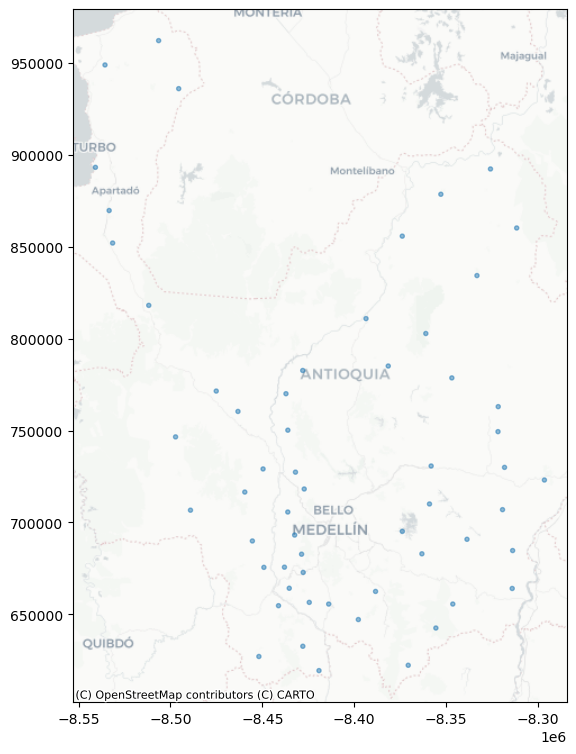

In [150]:
# f, ax = plt.subplots(1, figsize=(9, 9))
# points_covid19_cfr3_1.plot(column=labels,
#                     categorical=True,
#                     alpha=0.5,
#                     legend=False,
#                     ax=ax, marker='.'
#                     )
# hulls[hulls.index >=0].boundary.plot(color='k', ax=ax,)
# ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
f, ax = plt.subplots(1, figsize=(10, 9))

# Plot the points with DBSCAN cluster labels
points_covid19_cfr3_1.plot(
    column=labels,
    categorical=True,
    alpha=0.5,
    legend=False,
    ax=ax,
    marker='.'
)

# Plot the boundaries only if valid
valid_hulls = hulls[hulls.index >= 0]
if not valid_hulls.empty:
    valid_hulls.boundary.plot(color='k', ax=ax)

# Fix: ensure the CRS is projected for basemap (convert to EPSG:3857)
points_proj = points_covid19_cfr3_1.to_crs(epsg=3857)
valid_hulls_proj = valid_hulls.to_crs(epsg=3857)

# Plot the projected data on a new axis
ax.clear()
points_proj.plot(
    column=labels,
    categorical=True,
    alpha=0.5,
    legend=False,
    ax=ax,
    marker='.'
)
if not valid_hulls_proj.empty:
    valid_hulls_proj.boundary.plot(color='k', ax=ax)

# Add basemap (in Web Mercator)
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.Positron)


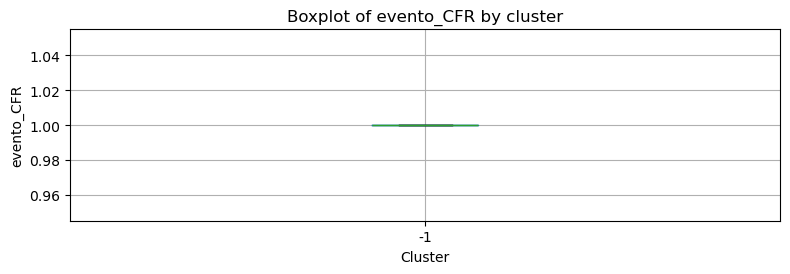

In [157]:
# f = plt.figure(figsize=(8,3))
# ax = points_covid19_cfr3_1.boxplot("evento_CFR", by=labels, 
#                             flierprops=dict(marker=None), 
#                             ax=plt.gca())
# ax.set_xlabel("densidad")
# ax.set_ylabel("evento_CFR")
# plt.gcf().suptitle(None)
# ax.set_title("CFR distribution by density clusters")
# ax.set_ylim(0,1250)
# plt.show()

# Copy the original DataFrame
df = points_covid19_cfr3_1.copy()

# Add the cluster labels as a new column
df["cluster"] = labels

# Now use 'cluster' as the 'by' argument
f = plt.figure(figsize=(8, 3))
ax = df.boxplot(
    column="evento_CFR",
    by="cluster",
    flierprops=dict(marker=None),
    ax=plt.gca()
)
ax.set_xlabel("Cluster")
ax.set_ylabel("evento_CFR")
plt.suptitle("")  # Remove automatic title
plt.title("Boxplot of evento_CFR by cluster")
plt.tight_layout()


## References

Chaparro-Narváez, P. E. (2021). Mortalidad por COVID-19 en Colombia. Boletín Técnico Interactivo No. 17. Instituto Nacional de Salud. Marzo 2021 ISSN: 2539-0597.

Chatterjee, P., Tiwari, M. K., Chakraborty, S., & Yazdani, M. (n.d.). Disruptive Technologies and Digital Transformations for Society 5.0 Series Editors. https://link.springer.com/bookseries/16676

  Dutta, I., Basu, T., & Das, A. (2021). Spatial analysis of COVID-19 incidence and its determinants using spatial modeling: A study on India. Environmental Challenges, 4. https://doi.org/10.1016/j.envc.2021.100096

  Kim, S., & Castro, M. C. (2020). Spatiotemporal pattern of COVID-19 and government response in South Korea (as of May 31, 2020). International Journal of Infectious Diseases, 98, 328–333. https://doi.org/10.1016/j.ijid.2020.07.004

  Korstanje, J. (2022). Machine Learning on Geographical Data Using Python: Introduction into Geodata with Applications and Use Cases. In Machine Learning on Geographical Data Using Python: Introduction into Geodata with Applications and Use Cases. Apress Media LLC. https://doi.org/10.1007/978-1-4842-8287-8

  Lin, B., Zou, L., Yang, M., Zhou, B., Mandal, D., Abedin, J., Cai, H., & Ning, N. (2024). Progress in understanding human-COVID-19 dynamics using geospatial big data: a systematic review. In Annals of GIS. Taylor and Francis Ltd. https://doi.org/10.1080/19475683.2024.2418584

  Paternina-Caicedo, A., Alvis-Guzmán, N., Duenãs, C., Narvaez, J., Smith, A. D., & de La Hoz-Restrepo, F. (2022). Impact of mobility restrictions on the dynamics of transmission of COVID-19 in Colombian cities. International Health, 14(3), 332–335. https://doi.org/10.1093/inthealth/ihab064

  Ruthberg, J. S., Quereshy, H. A., Jella, T. K., Kocharyan, A., D’Anza, B., Maronian, N., & Otteson, T. D. (2020). Geospatial analysis of COVID-19 and otolaryngologists above age 60. American Journal of Otolaryngology - Head and Neck Medicine and Surgery, 41(4). https://doi.org/10.1016/j.amjoto.2020.102514

  Yasuhirookawaharaaeditors, Y. (n.d.). New Frontiers in Regional Science: Asian Perspectives 65 Utilization offGeospatial Information in Daily Life Expression and Analysis offDynamic Life Activity.

  https://www.datos.gov.co/Estad-sticas-Nacionales/Poblaci-n-Antioquia-censada-2018-por-tipo-territor/evm3-92yw/about_data